In [2]:
# Cargo las librerias 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# Establecemos nuestro escritorio de trabajo
os.chdir(R'D:\UCM\Mineria')

# Cargo las funciones que voy a utilizar
from FuncionesMineria import (analizar_variables_categoricas, cuentaDistintos, frec_variables_num, 
                           atipicosAmissing, patron_perdidos, ImputacionCuant, ImputacionCuali)

# Cargo los datos
datos = pd.read_excel(r"D:\UCM\Mineria\DatosEleccionesEspaña.xlsx") 

In [340]:
datos

,Name,CodigoProvincia,CCAA,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,...,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones,Existe_Indus_Const_Com_Ser
0,Abadía,10,Extremadura,336,282,20.213,0,60.444,35.555,1.778,...,0.0,Otro,216.0,326.0,4507.5593,Baja,3.07,1.56,28.0,0
1,Abertura,10,Extremadura,429,364,25.275,0,54.779,44.118,0.368,...,0.0,Otro,382.0,459.0,6270.7646,Baja,-6.54,1.12,67.0,0
2,Acebo,10,Extremadura,569,569,27.241,0,44.203,53.140,0.966,...,0.0,Otro,918.0,674.0,5702.1000,Baja,-15.58,0.62,74.0,0
3,Acehúche,10,Extremadura,822,704,30.114,1,50.813,45.325,0.000,...,0.0,Otro,599.0,842.0,9106.4649,Baja,-2.38,1.37,66.0,0
4,Aceituna,10,Extremadura,623,540,30.185,1,44.562,49.867,0.796,...,0.0,Otro,394.0,625.0,4007.6141,Baja,-0.32,1.58,96.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,Vizcaínos,9,CastillaLeón,49,41,21.951,0,50.000,43.750,3.125,...,0.0,Otro,66.0,49.0,1148.3348,Baja,0.00,0.74,2.0,0
8115,Zael,9,CastillaLeón,115,110,18.182,0,18.889,76.667,3.333,...,0.0,Otro,130.0,116.0,1876.4605,Baja,-0.86,0.88,19.0,0
8116,Zarzosa de Río Pisuerga,9,CastillaLeón,31,33,15.152,0,25.000,71.429,3.571,...,0.0,Otro,59.0,36.0,1081.1846,Baja,-13.89,0.53,11.0,0
8117,Zazuar,9,CastillaLeón,242,211,25.118,0,37.975,60.126,1.266,...,0.0,Otro,285.0,256.0,2257.9414,Baja,-5.47,0.85,47.0,0


In [3]:
# Comprobamos el tipo de formato de las variables variable que se ha asignado en la lectura.
#datos.dtypes
#datos.nunique()

In [4]:
# Genera una lista con los nombres de las variables.
variables = list(datos.columns)   

In [5]:
# Indico las categóricas que aparecen como numéricas
numericasAcategoricas = ['Name','CodigoProvincia','CCAA','AbstencionAlta','Izquierda','Derecha','ActividadPpal']

# Las transformo en categóricas
for var in numericasAcategoricas:
    datos[var] = datos[var].astype(str)

In [6]:
# Seleccionar las columnas numéricas del DataFrame
numericas = datos.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
# Seleccionar las columnas categóricas del DataFrame
categoricas = [variable for variable in variables if variable not in numericas]

In [7]:
#datos.dtypes

In [8]:
#analizar_variables_categoricas(datos)

In [9]:
# Cuenta el número de valores distintos de cada una de las variables numéricas de un DataFrame
#cuentaDistintos(datos)

In [10]:
#datos['Name'].value_counts()

In [11]:
#datos[categoricas].nunique()

In [12]:
#datos['CodigoProvincia'].unique()

In [13]:
#datos['CCAA'].unique()

In [14]:
#datos['AbstencionAlta'].unique()

In [15]:
#datos['Izquierda'].unique()

In [16]:
#datos['Derecha'].unique()

In [17]:
#datos['ActividadPpal'].unique()

In [18]:
#datos ? 
#datos['Densidad'].unique()

In [19]:
#analizar_variables_categoricas(datos[categoricas])

In [20]:
#AbstencionAlta ,Izquierda, Derecha son dicotomicas
#Industria, Construcción, ComercTTEHostelería y mas de lamitad de datos en 0 
#datos extraños en terminaciones porcentage mayor a 100% y negativos (PobChange_pct negativo si la pobalcion disminuye)

descriptivos_num = datos.describe().T

# Añadimos más descriptivos a los anteriores
for num in numericas:
    descriptivos_num.loc[num, "Asimetria"] = datos[num].skew()
    descriptivos_num.loc[num, "Kurtosis"] = datos[num].kurtosis()
    descriptivos_num.loc[num, "Rango"] = np.ptp(datos[num].dropna().values)
#descriptivos_num.round(3)

In [21]:
# Muestra valores perdidos: 
#totalEmpresas, Industria, Construccion, ComercTTEHosteleria, Servicios, inmuebles, Pob2010, SUPERFICIE, PobChange_pct PersonasInmueble 

datos[variables].isna().sum()


Name                              0
CodigoProvincia                   0
CCAA                              0
Population                        0
TotalCensus                       0
AbstentionPtge                    0
AbstencionAlta                    0
Izda_Pct                          0
Dcha_Pct                          0
Otros_Pct                         0
Izquierda                         0
Derecha                           0
Age_0-4_Ptge                      0
Age_under19_Ptge                  0
Age_19_65_pct                     0
Age_over65_pct                    0
WomanPopulationPtge               0
ForeignersPtge                    0
SameComAutonPtge                  0
SameComAutonDiffProvPtge          0
DifComAutonPtge                   0
UnemployLess25_Ptge               0
Unemploy25_40_Ptge                0
UnemployMore40_Ptge               0
AgricultureUnemploymentPtge       0
IndustryUnemploymentPtge          0
ConstructionUnemploymentPtge      0
ServicesUnemploymentPtge    

In [22]:
# A veces los 'nan' vienen como como una cadena de caracteres, los modificamos a perdidos.
for x in categoricas:
    datos[x] = datos[x].replace('nan', np.nan) 

In [23]:
#TRATAR DATOS
#Ponemos en missings datos erroneos.
#Densidad tiene valores ?
#datos extraños en terminaciones porcentage mayor a 100% y negativos como en ForeignersPtge 
#(PobChange_pct no es necesario por que valores negativos significan disminucion de poblacion)
#explotaciones valores 999999
#superficioe agetb porcentage mayor a 100


# Reemplazar '?' en la columna 'Densidad' por NaN (valores nulos)
datos['Densidad'] = datos['Densidad'].replace('?', np.nan)
# Reemplazar valores menores que 0 en la columna 'ForeignersPtge' por NaN
datos.loc[datos['ForeignersPtge'] < 0, 'ForeignersPtge'] = np.nan
# Reemplazar valores mayores que 100 en la columna 'SameComAutonPtge' por NaN
datos.loc[datos['SameComAutonPtge'] > 100, 'SameComAutonPtge'] = np.nan
datos.loc[datos['Age_19_65_pct'] > 100, 'Age_19_65_pct'] = np.nan
# Reemplazar valores iguales a 99999 en la columna 'Explotaciones' por NaN
datos.loc[datos['Explotaciones'] == 99999, 'Explotaciones'] = np.nan

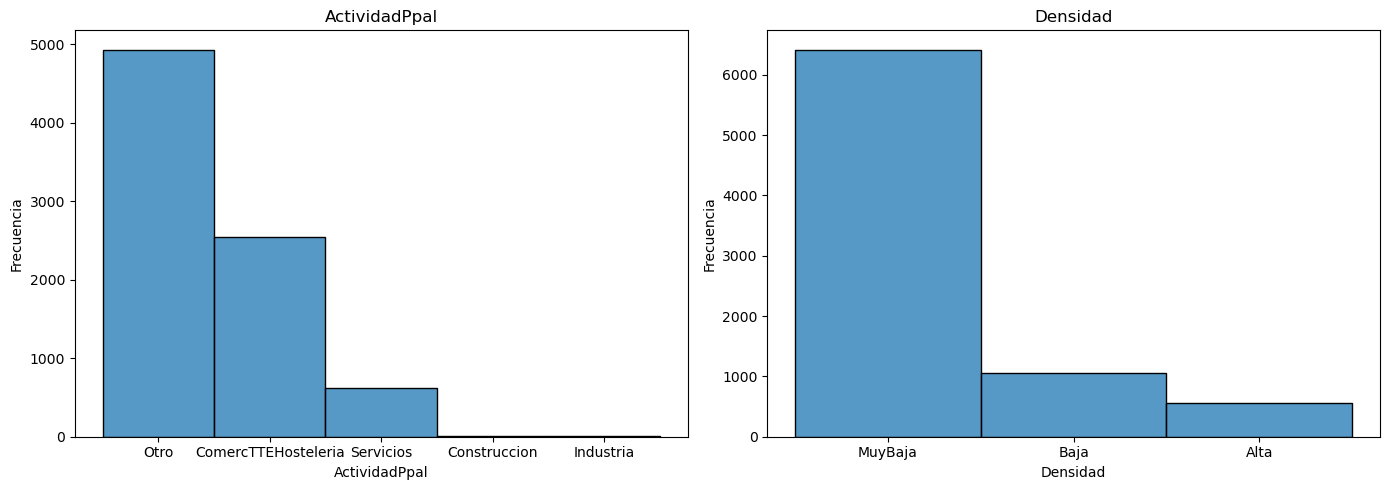

In [24]:
#Graficamos lafrecuencia y distribucion de las variables categoricas(no tomamos en cuenta las variables objetivo, ni
# Name , CodigoProvincia , Y CCAA al ser variables no triviales que ya tienen complejidad geografica)
#Observamos los grupos poco representados, podemos agrupar para mejorar la data.

#representar por porcentajes-
cat=['ActividadPpal', 'Densidad']
total_cols = 2
total_rows = (len(cat) + 1) // total_cols
plt.figure(figsize=(14, 5))
for i, column in enumerate(cat, 1):
    plt.subplot(total_rows, total_cols, i)
    sns.histplot(datos[column], kde=False, bins=20)
    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [25]:

#Vamos a juntar Industria Construccion y Servicios, Alta y Baja se transformara a Altay Muy baja quedara como Baja

datos['ActividadPpal'] = datos['ActividadPpal'].replace(['Construccion', 'Industria', 'Servicios'], 'Construccion/Industria/Servicios')
datos['ActividadPpal'] = datos['ActividadPpal'].replace('ComercTTEHosteleria', 'Hosteleria')

datos['Densidad'].fillna(np.nan, inplace=True) #nunpy nan 
# Agrupar categorías en la columna 'Densidad'

datos['Densidad'] = datos['Densidad'].replace(['Alta', 'Baja'], 'Alta')
datos['Densidad'] = datos['Densidad'].replace('MuyBaja', 'Baja')


# Crear una nueva columna categorica existe o no industria agrupando las industrias.

datos['Existe_Indus_Const_Com_Ser'] = datos[['Industria', 'Construccion', 'ComercTTEHosteleria', 'Servicios']].sum(axis=1)
datos['Existe_Indus_Const_Com_Ser'] = datos['Existe_Indus_Const_Com_Ser'].apply(lambda x: '1' if x > 0 else '0')



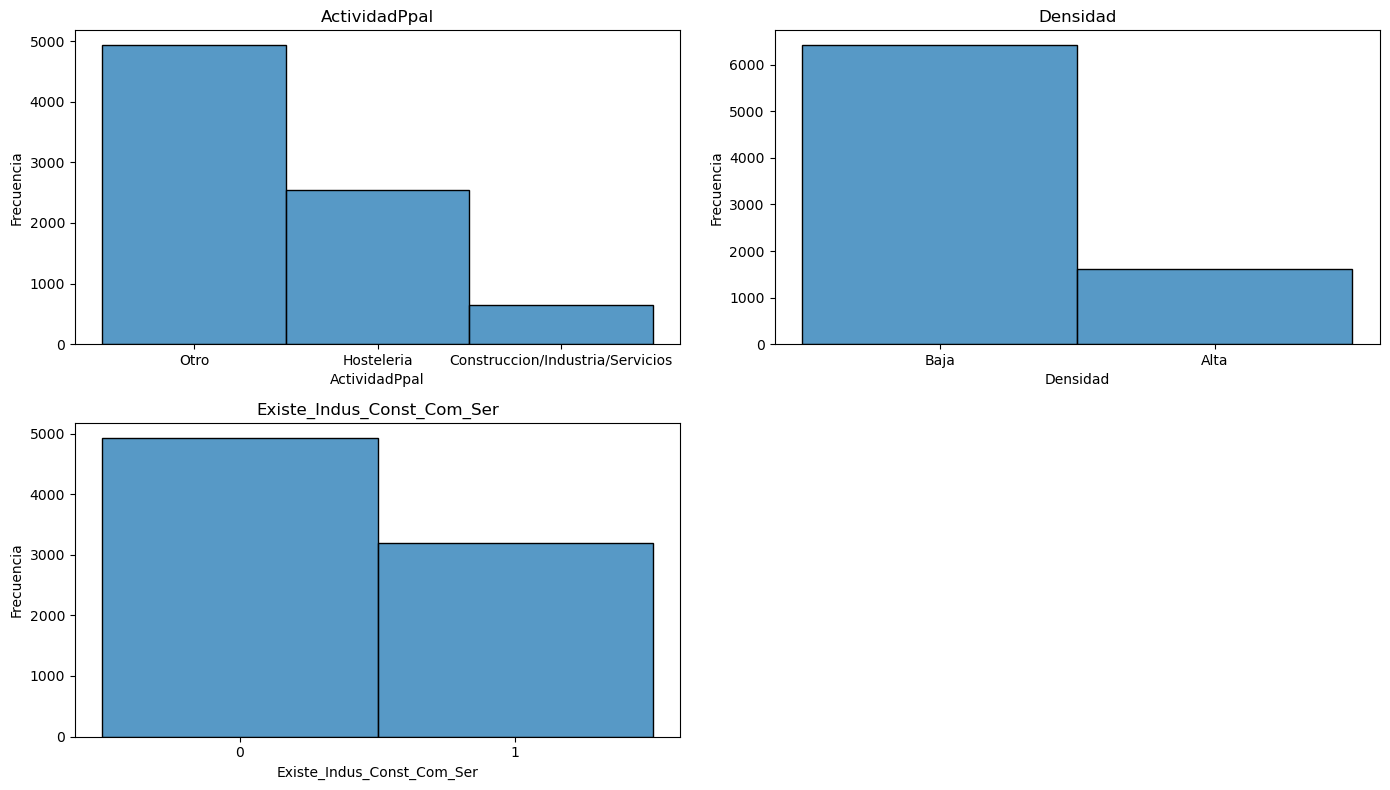

In [26]:
#Graficamos lafrecuencia y distribucion de las variables categoricas
#Observamos los grupos poco representados, podemos agrupar para mejorar la data.
cat=['ActividadPpal', 'Densidad','Existe_Indus_Const_Com_Ser']
total_cols = 2
total_rows = (len(cat) + 1) // total_cols

plt.figure(figsize=(14, 8))

for i, column in enumerate(cat, 1):
    plt.subplot(total_rows, total_cols, i)
    sns.histplot(datos[column], kde=False, bins=20)
    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")


plt.tight_layout()
plt.show()

In [27]:
# Indico las variableObj 

varObjCont = datos['Izda_Pct']
varObjBin = datos['Derecha']

# las Input (los atipicos y los missings se gestionan solo de las variables input)
# Elimino las variables objetivo del conjunto de datos input, también elinimo las variables year y month
datos_input = datos.drop(['Name','AbstencionAlta','AbstentionPtge','Izda_Pct','Dcha_Pct','Otros_Pct','Izquierda','Derecha'], axis = 1)

# Genera una lista con los nombres de las variables del cojunto de datos input.
variables_input = list(datos_input.columns)  

# Selecionamos las variables numéricas
numericas_input = datos_input.select_dtypes(include = ['int', 'int32', 'int64','float', 'float32', 'float64']).columns

# Selecionamos las variables categóricas
categoricas_input = [variable for variable in variables_input if variable not in numericas_input]


In [28]:
# Cuento el porcentaje de atipicos de cada variable. 

# Seleccionar las columnas numéricas en el DataFrame
# Calcular la proporción de valores atípicos para cada columna numérica
# utilizando una función llamada 'atipicosAmissing'
# 'x' representa el nombre de cada columna numérica mientras se itera a través de 'numericas'
# 'atipicosAmissing(datos_input[x])' es una llamada a una función que devuelve una dupla
# donde el segundo elemento ([1]) es el número de valores atípicos
# 'len(datos_input)' es el número total de filas en el DataFrame de entrada
# La proporción de valores atípicos se calcula dividiendo la cantidad de valores atípicos por el número total de filas

In [29]:
resultados = {x: atipicosAmissing(datos_input[x])[1] / len(datos_input) for x in numericas_input}
resultados

{'Population': 0.09927330952087696,
 'TotalCensus': 0.09619411257544032,
 'Age_0-4_Ptge': 0.0,
 'Age_under19_Ptge': 0.0,
 'Age_19_65_pct': 0.0028328611898017,
 'Age_over65_pct': 0.0,
 'WomanPopulationPtge': 0.0025865254341667695,
 'ForeignersPtge': 0.0,
 'SameComAutonPtge': 0.0,
 'SameComAutonDiffProvPtge': 0.020322699839881758,
 'DifComAutonPtge': 0.004926715112698608,
 'UnemployLess25_Ptge': 0.003202364823254095,
 'Unemploy25_40_Ptge': 0.0,
 'UnemployMore40_Ptge': 0.0,
 'AgricultureUnemploymentPtge': 0.019953196206429363,
 'IndustryUnemploymentPtge': 0.00591205813523833,
 'ConstructionUnemploymentPtge': 0.006527897524325656,
 'ServicesUnemploymentPtge': 0.0,
 'totalEmpresas': 0.0,
 'Industria': 0.0,
 'Construccion': 0.0,
 'ComercTTEHosteleria': 0.0,
 'Servicios': 0.0,
 'inmuebles': 0.0,
 'Pob2010': 0.0,
 'SUPERFICIE': 0.0,
 'PobChange_pct': 0.0,
 'PersonasInmueble': 0.0,
 'Explotaciones': 0.0}

In [30]:
# Modifico los atipicos como missings
for x in numericas_input:
    datos_input[x] = atipicosAmissing(datos_input[x])[0]



In [31]:
# MISSINGS
# Visualiza un mapa de calor que muestra la matriz de correlación de valores ausentes en el conjunto de datos.
#patron_perdidos(datos_input)

In [32]:
# Muestra total de valores perdidos por cada variable
datos_input.isna().sum()

CodigoProvincia                   0
CCAA                              0
Population                      806
TotalCensus                     781
Age_0-4_Ptge                      0
Age_under19_Ptge                  0
Age_19_65_pct                    24
Age_over65_pct                    0
WomanPopulationPtge              21
ForeignersPtge                  653
SameComAutonPtge                  3
SameComAutonDiffProvPtge        165
DifComAutonPtge                  40
UnemployLess25_Ptge              26
Unemploy25_40_Ptge                0
UnemployMore40_Ptge               0
AgricultureUnemploymentPtge     162
IndustryUnemploymentPtge         48
ConstructionUnemploymentPtge     53
ServicesUnemploymentPtge          0
totalEmpresas                     5
Industria                       188
Construccion                    139
ComercTTEHosteleria               9
Servicios                        62
ActividadPpal                     0
inmuebles                       138
Pob2010                     

In [33]:
# Muestra proporción de valores perdidos por cada variable (guardo la información)
prop_missingsVars = datos_input.isna().sum()/len(datos_input)
prop_missingsVars

CodigoProvincia                 0.000000
CCAA                            0.000000
Population                      0.099273
TotalCensus                     0.096194
Age_0-4_Ptge                    0.000000
Age_under19_Ptge                0.000000
Age_19_65_pct                   0.002956
Age_over65_pct                  0.000000
WomanPopulationPtge             0.002587
ForeignersPtge                  0.080429
SameComAutonPtge                0.000370
SameComAutonDiffProvPtge        0.020323
DifComAutonPtge                 0.004927
UnemployLess25_Ptge             0.003202
Unemploy25_40_Ptge              0.000000
UnemployMore40_Ptge             0.000000
AgricultureUnemploymentPtge     0.019953
IndustryUnemploymentPtge        0.005912
ConstructionUnemploymentPtge    0.006528
ServicesUnemploymentPtge        0.000000
totalEmpresas                   0.000616
Industria                       0.023156
Construccion                    0.017120
ComercTTEHosteleria             0.001109
Servicios       

In [34]:
# Creamos la variable prop_missings que recoge el número de valores perdidos por cada observación
datos_input['prop_missings'] = datos_input.isna().mean(axis = 1)
# Realizamos un estudio descriptivo básico a la nueva variable
datos_input['prop_missings'].describe()


count    8119.000000
mean        0.013639
std         0.024829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.029412
max         0.323529
Name: prop_missings, dtype: float64

In [35]:
# Calculamos el número de valores distintos que tiene la nueva variable
len(datos_input['prop_missings'].unique())

8

In [36]:
#datos_input["CodigoProvincia"].value_counts()

In [37]:
# Elimino las observaciones con datos missings
eliminar = datos_input['prop_missings'] > 0.50
datos_input = datos_input[~eliminar]
varObjBin = varObjBin[~eliminar]
varObjCont = varObjCont[~eliminar]

In [38]:
datos_input['prop_missings'].value_counts()

0.000000    5783
0.029412    1159
0.058824     991
0.088235     157
0.117647      21
0.323529       4
0.147059       3
0.294118       1
Name: prop_missings, dtype: int64

In [39]:
# Transformo la nueva variable en categórica (ya que tiene pocos valores diferentes)
datos_input["prop_missings"] = datos_input["prop_missings"].astype(str)


# Agrego 'prop_missings' a la lista de nombres de variables input
variables_input.append('prop_missings')
categoricas_input.append('prop_missings')

In [40]:
datos_input['prop_missings'].value_counts()

0.0                     5783
0.029411764705882353    1159
0.058823529411764705     991
0.08823529411764706      157
0.11764705882352941       21
0.3235294117647059         4
0.14705882352941177        3
0.29411764705882354        1
Name: prop_missings, dtype: int64

In [41]:
#datos[datos['CodigoProvincia'].isin(['52','51'])]

In [42]:
#datos[datos['CodigoProvincia'].isin(['4'])& (datos['Izda_Pct'] < 40)& (datos['Population'] > 60000)]


In [43]:
#datos_input.head(20)

In [44]:
# Elimino las variables con mas de la mitad de datos missings (no hay ninguna)
eliminar = [prop_missingsVars.index[x] for x in range(len(prop_missingsVars)) if prop_missingsVars[x] > 0.5]
datos_input = datos_input.drop(eliminar, axis = 1)

In [45]:
numericas_input


Index(['Population', 'TotalCensus', 'Age_0-4_Ptge', 'Age_under19_Ptge',
       'Age_19_65_pct', 'Age_over65_pct', 'WomanPopulationPtge',
       'ForeignersPtge', 'SameComAutonPtge', 'SameComAutonDiffProvPtge',
       'DifComAutonPtge', 'UnemployLess25_Ptge', 'Unemploy25_40_Ptge',
       'UnemployMore40_Ptge', 'AgricultureUnemploymentPtge',
       'IndustryUnemploymentPtge', 'ConstructionUnemploymentPtge',
       'ServicesUnemploymentPtge', 'totalEmpresas', 'Industria',
       'Construccion', 'ComercTTEHosteleria', 'Servicios', 'inmuebles',
       'Pob2010', 'SUPERFICIE', 'PobChange_pct', 'PersonasInmueble',
       'Explotaciones'],
      dtype='object')

In [46]:
categoricas_input

['CodigoProvincia',
 'CCAA',
 'ActividadPpal',
 'Densidad',
 'Existe_Indus_Const_Com_Ser',
 'prop_missings']

In [47]:
## IMPUTACIONES

#CCAA  tienen dos categorias solo un dato y esa categoria es sumamente poco representada nos dara problemas al momento de entrenamiento, elimnaremos esas categorias
#Observamos los grupos poco representados, podemos agrupar para mejorar la data.
#datos['CCAA'].value_counts() junto con Codigo provincia donde se encuentran los datos.

#Cualitativas poco representadas

datos_input['CCAA'] = datos_input['CCAA'].replace({'Ceuta': 'Andalucía', 'Melilla': 'Andalucía'})
datos_input['CodigoProvincia'] = datos_input['CodigoProvincia'].replace({'51': '11', '52': '11'})
nuevos_nombres = {'0.11764705882352941': '0.10-0.30', '0.3235294117647059': '0.10-0.30',
                  '0.14705882352941177': '0.10-0.30', '0.29411764705882354': '0.10-0.30'}
datos_input['prop_missings'].replace(nuevos_nombres, inplace=True)

# Imputo todas las cuantitativas, seleccionar el tipo de imputacion: media, mediana o aleatorio
for x in numericas_input:
    datos_input[x] = ImputacionCuant(datos_input[x], 'mediana')
    
# Imputo todas las cualitativas, seleccionar el tipo de imputacion: moda o aleatorio
for x in categoricas_input:
    datos_input[x] = ImputacionCuali(datos_input[x], 'aleatorio')
    
    

In [48]:

# Reviso que no queden datos missings
#datos_input.isna().sum()

In [49]:
datos_input = pd.concat([varObjBin, varObjCont, datos_input], axis = 1)

In [50]:
#datos_input.head()

In [51]:
# Una vez finalizado este proceso, se puede considerar que los datos estan depurados. Los guardamos
#datos_input = pd.concat([varObjBin, varObjCont, datos_input], axis = 1)
with open('DatosDepurados.pickle','wb') as archivo:
    pickle.dump(datos_input, archivo)



# Transformacion de variables

In [52]:
# Cargo las librerias 
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir(r'D:\UCM\Mineria')


# Cargo las funciones que voy a utilizar despues
from FuncionesMineria import (graficoVcramer, mosaico_targetbinaria, boxplot_targetbinaria, 
                           hist_targetbinaria, Transf_Auto, lm, Rsq, validacion_cruzada_lm,
                           modelEffectSizes, crear_data_modelo, Vcramer)

# Parto de los datos ya depurados
with open('DatosDepurados.pickle', 'rb') as f:
    Datos = pickle.load(f)

# Defino las variables objetivo y las elimino del conjunto de datos input

varObjCont =Datos['Izda_Pct']
varObjBin = Datos['Derecha']

datos_input = Datos.drop(['Izda_Pct', 'Derecha'], axis = 1) 
 
# Genera una lista con los nombres de las variables.
variables = list(datos_input.columns)  

In [53]:
#variables

In [54]:
#numericas_input

In [55]:
#categoricas_input

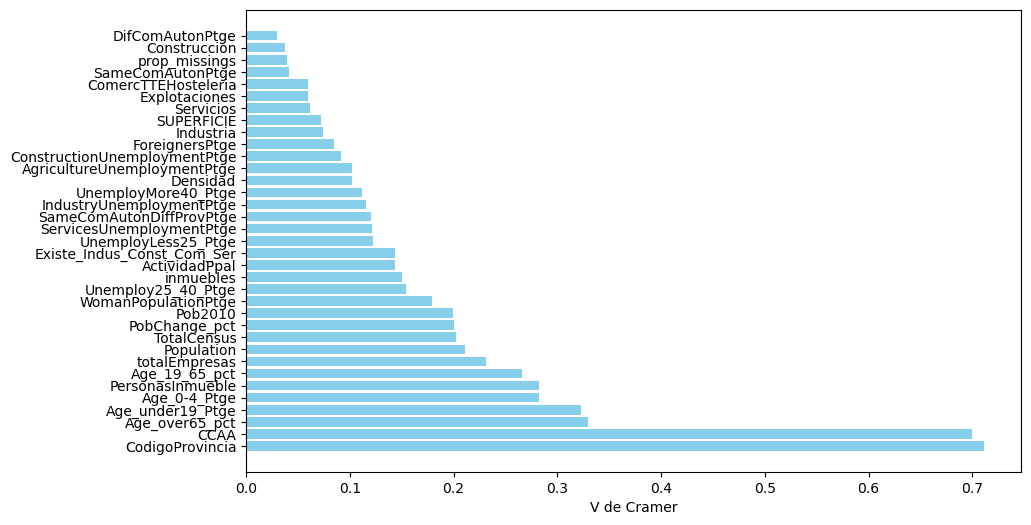

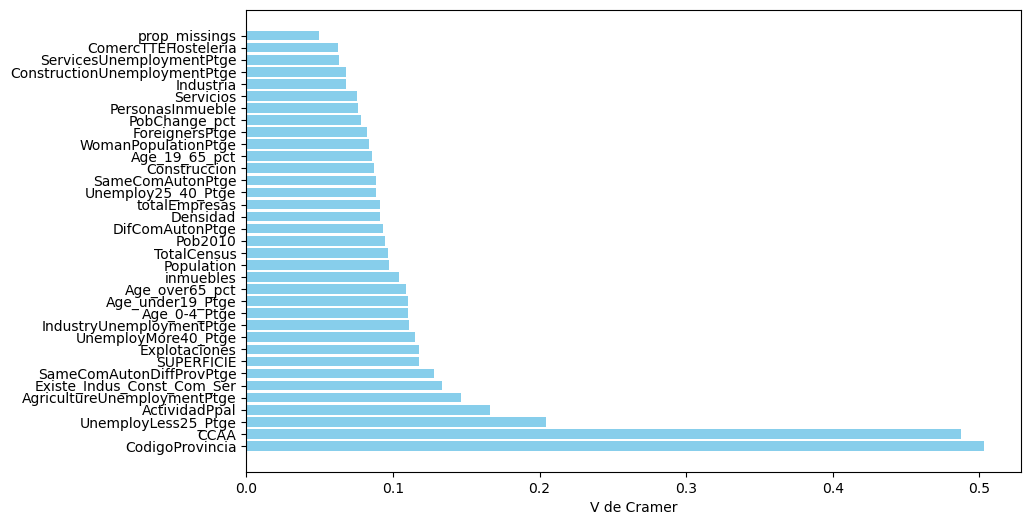

In [56]:
# Obtengo la importancia de las variables
graficoVcramer(datos_input, varObjBin)
graficoVcramer(datos_input, varObjCont)

In [57]:
# Crear un DataFrame para almacenar los resultados del coeficiente V de Cramer
VCramer = pd.DataFrame(columns=['Variable', 'Objetivo', 'Vcramer'])

for variable in variables:
    v_cramer = Vcramer(datos_input[variable], varObjCont)
    VCramer = VCramer.append({'Variable': variable, 'Objetivo': varObjCont.name, 'Vcramer': v_cramer},
                             ignore_index=True)
    
for variable in variables:
    v_cramer = Vcramer(datos_input[variable], varObjBin)
    VCramer = VCramer.append({'Variable': variable, 'Objetivo': varObjBin.name, 'Vcramer': v_cramer},
                             ignore_index=True)

In [58]:
Vcat = VCramer[VCramer['Objetivo'] == 'Derecha'].sort_values(by='Vcramer', ascending=False)
Vnum = VCramer[VCramer['Objetivo'] == 'Izda_Pct'].sort_values(by='Vcramer', ascending=False)

In [59]:
#Vcat

In [60]:
# Veo graficamente el efecto de dos variables cualitativas sobre la binaria
## Tomo las variables con más y menos relación con la variable objetivo Binaria
#mosaico_targetbinaria(datos_input['CCAA'], varObjBin, 'CCAA')
#mosaico_targetbinaria(datos_input['prop_missings'], varObjBin, 'prop_missings')

# Veo graficamente el efecto de dos variables cuantitativas sobre la binaria
#boxplot_targetbinaria(datos_input['Alcohol'], varObjBin, 'Alcohol')
#boxplot_targetbinaria(datos_input['CloruroSodico'], varObjBin, 'CloruroSodico')
#
#hist_targetbinaria(datos_input['Alcohol'], varObjBin, 'Alcohol')
#hist_targetbinaria(datos_input['CloruroSodico'], varObjBin, 'CloruroSodico')

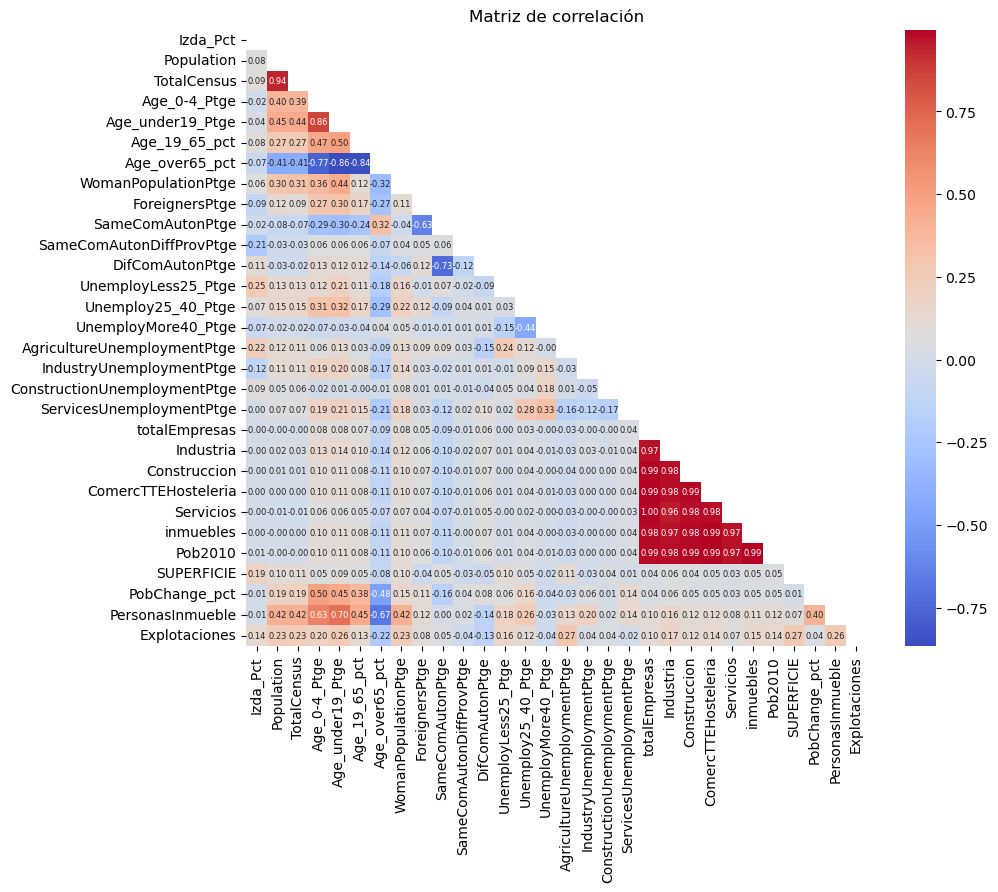

In [61]:
matriz_corr = pd.concat([varObjCont,datos_input[numericas_input]],axis= 1).corr(method='pearson')
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 10x8 pulgadas
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    mask=mask,
    annot_kws={"size": 6}  # Ajustar el tamaño de la fuente de los valores
)

# Establecer el título del gráfico
plt.title("Matriz de correlación")

# Rotar las etiquetas de los ejes para mejorar la legibilidad
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Mostrar el gráfico de la matriz de correlación
plt.show()

In [62]:
umbral = 0.7  # Establecer el umbral de correlación

# Filtrar correlaciones por encima del umbral
correlaciones_altas = matriz_corr[(abs(matriz_corr) > umbral) & (matriz_corr != 1)]

# Convertir la matriz en una lista ordenada por correlación
correlaciones_ordenadas = (
    correlaciones_altas.stack()  # Apilar los valores de correlación
    .sort_values(ascending=False)  # Ordenar de forma descendente
    .reset_index()  # Restablecer el índice
    .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'})  # Renombrar columnas
)

# Filtrar solo las correlaciones únicas y superiores al umbral
correlaciones_filtradas = correlaciones_ordenadas.drop_duplicates(subset='Correlación')

print(correlaciones_filtradas)

             Variable 1           Variable 2  Correlación
0             Servicios        totalEmpresas     0.996780
2               Pob2010            inmuebles     0.994924
4               Pob2010  ComercTTEHosteleria     0.993626
6         totalEmpresas  ComercTTEHosteleria     0.992144
8             inmuebles  ComercTTEHosteleria     0.991606
10        totalEmpresas         Construccion     0.990555
12         Construccion              Pob2010     0.988629
14        totalEmpresas              Pob2010     0.987353
16         Construccion  ComercTTEHosteleria     0.986260
18            inmuebles        totalEmpresas     0.983417
20            inmuebles         Construccion     0.982886
22            Servicios         Construccion     0.981596
24  ComercTTEHosteleria            Servicios     0.979689
26  ComercTTEHosteleria            Industria     0.977342
28         Construccion            Industria     0.976065
30            Industria              Pob2010     0.975359
32            

In [63]:

# Busco las mejores transformaciones para las variables numericas con respesto a los dos tipos de variables
input_cont = pd.concat([datos_input, Transf_Auto(datos_input[numericas_input], varObjCont)], axis = 1)
input_bin = pd.concat([datos_input, Transf_Auto(datos_input[numericas_input], varObjBin)], axis = 1)

# Creamos conjuntos de datos que contengan las variables explicativas y una de las variables objetivo y los guardamos
todo_cont = pd.concat([input_cont, varObjCont], axis = 1)
todo_bin = pd.concat([input_bin, varObjBin], axis = 1)
with open('todo_bin.pickle', 'wb') as archivo:
    pickle.dump(todo_bin, archivo)
with open('todo_cont.pickle', 'wb') as archivo:
    pickle.dump(todo_cont, archivo)


In [64]:
input_cont

,CodigoProvincia,CCAA,Population,TotalCensus,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,WomanPopulationPtge,ForeignersPtge,...,logxIndustria,logxConstruccion,logxComercTTEHosteleria,logxServicios,logxinmuebles,logxPob2010,raiz4SUPERFICIE,sqrxPobChange_pct,cuartaxPersonasInmueble,raiz4Explotaciones
0,10,Extremadura,336.0,282.0,3.869,18.155,55.059,26.785,44.048,0.89,...,-11.135134,-11.374374,-11.339436,-11.868307,-4.741685,-4.995506,0.836254,28.438075,44.396358,0.589778
1,10,Extremadura,429.0,364.0,1.632,13.055,56.643,30.304,50.117,1.63,...,-11.135134,-11.374374,-11.339436,-11.868307,-4.159874,-4.649377,0.908231,19.419583,10.452560,0.737404
2,10,Extremadura,569.0,569.0,1.230,9.139,54.834,36.028,49.033,0.70,...,-11.135134,-11.374374,-11.339436,-11.868307,-3.274322,-4.262100,0.886894,12.501298,0.679857,0.756220
3,10,Extremadura,822.0,704.0,4.258,14.964,60.098,24.940,51.095,0.12,...,-11.135134,-11.374374,-11.339436,-11.868307,-3.704579,-4.038233,0.997044,23.113037,25.315058,0.734595
4,10,Extremadura,623.0,540.0,3.531,15.569,59.391,25.042,48.154,0.64,...,-11.135134,-11.374374,-11.339436,-11.868307,-4.128484,-4.338096,0.812024,25.060968,46.896750,0.807689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,9,CastillaLeón,49.0,41.0,0.000,4.082,63.267,32.653,36.735,0.00,...,-11.135134,-11.374374,-11.339436,-11.868307,-5.990660,-6.971493,0.593926,25.370630,1.582786,0.259471
8115,9,CastillaLeón,115.0,110.0,0.000,5.218,44.348,50.436,48.696,0.87,...,-11.135134,-11.374374,-11.339436,-11.868307,-5.267459,-6.054019,0.671617,24.542724,3.531536,0.532954
8116,9,CastillaLeón,31.0,33.0,0.000,0.000,58.065,41.936,38.710,0.00,...,-11.135134,-11.374374,-11.339436,-11.868307,-6.114013,-7.316267,0.585030,13.679325,0.312767,0.460182
8117,9,CastillaLeón,242.0,211.0,0.826,11.156,57.438,31.406,47.107,0.41,...,-11.135134,-11.374374,-11.339436,-11.868307,-4.457956,-5.240993,0.703452,20.338886,3.012579,0.673779


In [65]:
input_cont_T = pd.concat([ Datos[categoricas_input],Transf_Auto(datos_input[numericas_input], varObjCont)], axis = 1)
input_bin_T = pd.concat([ Datos[categoricas_input],Transf_Auto(datos_input[numericas_input], varObjBin)], axis = 1)

todo_cont_T = pd.concat([input_cont_T, varObjCont], axis = 1)
todo_bin_T = pd.concat([input_bin_T, varObjBin], axis = 1)
with open('todo_bin_T.pickle', 'wb') as archivo:
    pickle.dump(todo_bin, archivo)
with open('todo_cont_T.pickle', 'wb') as archivo:
    pickle.dump(todo_cont, archivo)


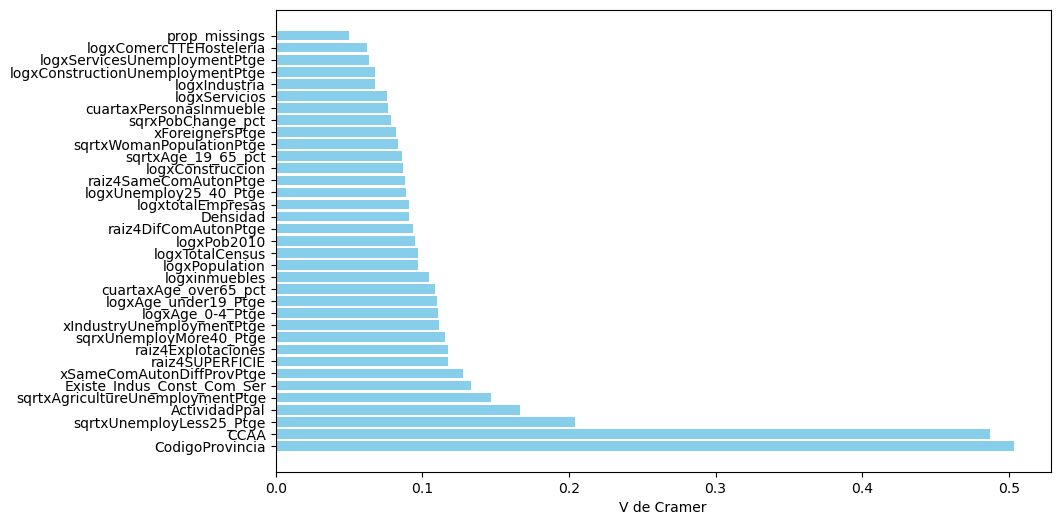

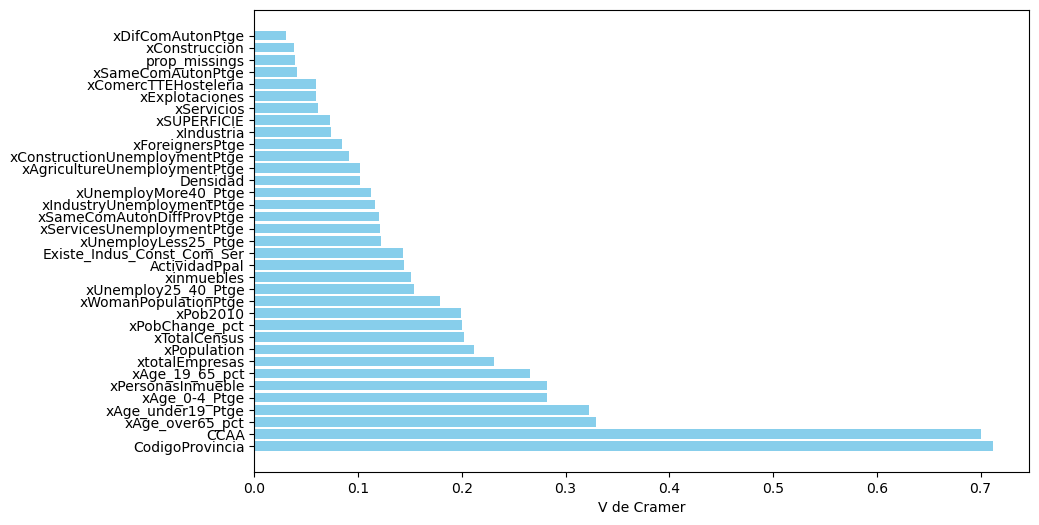

In [66]:
graficoVcramer(input_cont_T, varObjCont)
graficoVcramer(input_bin_T, varObjBin)

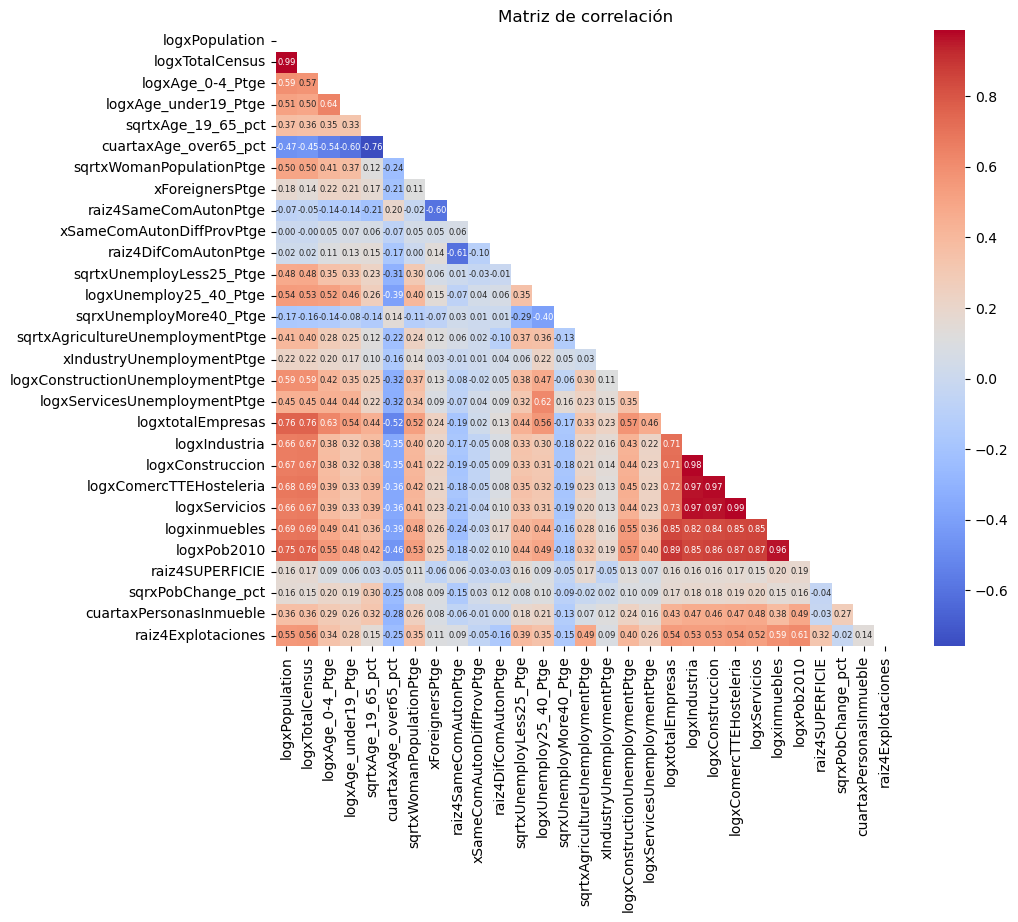

In [67]:
matriz_corr = input_cont_T.corr(method='pearson')
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 10x8 pulgadas
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    mask=mask,
    annot_kws={"size": 6}  # Ajustar el tamaño de la fuente de los valores
)

# Establecer el título del gráfico
plt.title("Matriz de correlación")

# Rotar las etiquetas de los ejes para mejorar la legibilidad
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Mostrar el gráfico de la matriz de correlación
plt.show()

In [68]:
umbral = 0.7  # Establecer el umbral de correlación

# Filtrar correlaciones por encima del umbral
correlaciones_altas = matriz_corr[(abs(matriz_corr) > umbral) & (matriz_corr != 1)]

# Convertir la matriz en una lista ordenada por correlación
correlaciones_ordenadas = (
    correlaciones_altas.stack()  # Apilar los valores de correlación
    .sort_values(ascending=False)  # Ordenar de forma descendente
    .reset_index()  # Restablecer el índice
    .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'})  # Renombrar columnas
)

# Filtrar solo las correlaciones únicas y superiores al umbral
correlaciones_filtradas = correlaciones_ordenadas.drop_duplicates(subset='Correlación')

correlaciones_filtradas.head(20)

,Variable 1,Variable 2,Correlación
0,logxServicios,logxComercTTEHosteleria,0.987035
2,logxPopulation,logxTotalCensus,0.986093
4,logxIndustria,logxConstruccion,0.984566
6,logxComercTTEHosteleria,logxConstruccion,0.973876
8,logxServicios,logxIndustria,0.969892
10,logxServicios,logxConstruccion,0.966491
12,logxComercTTEHosteleria,logxIndustria,0.965402
14,logxinmuebles,logxPob2010,0.962027
16,logxPob2010,logxtotalEmpresas,0.892303
18,logxPob2010,logxServicios,0.874904


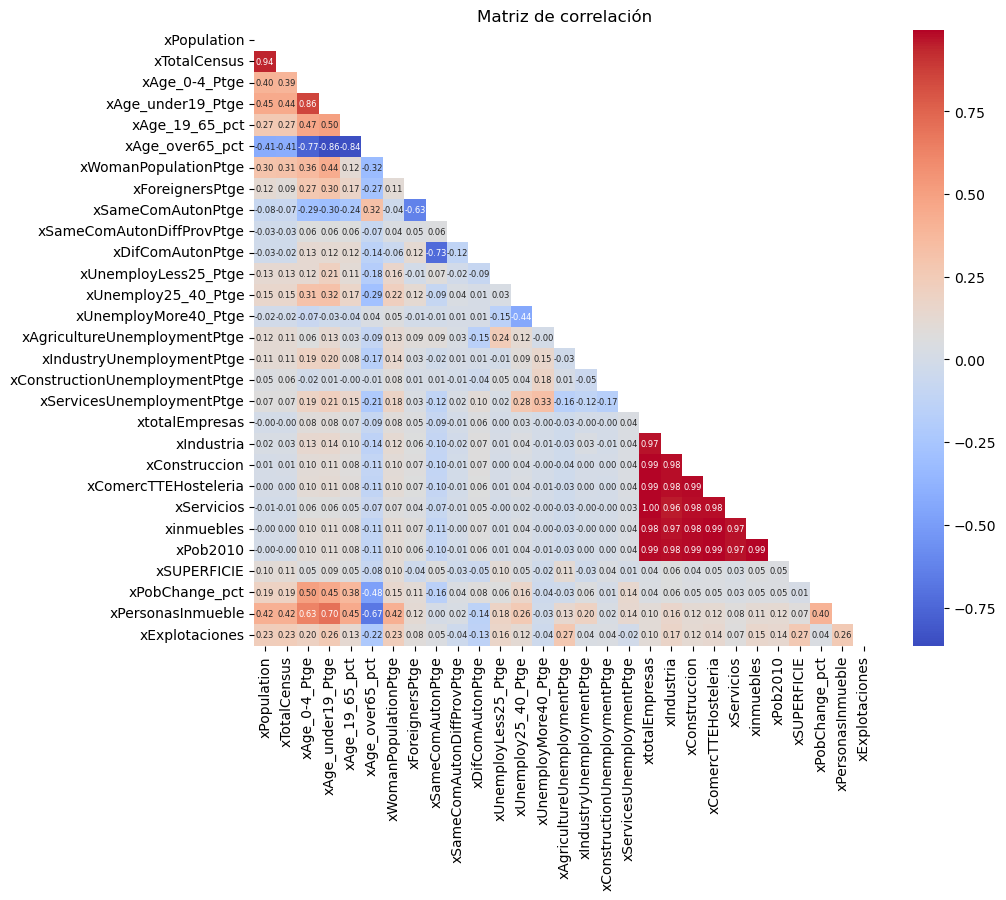

In [69]:
matriz_corr = input_bin_T.corr(method='pearson')
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear una figura para el gráfico con un tamaño de 10x8 pulgadas
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    mask=mask,
    annot_kws={"size": 6}  # Ajustar el tamaño de la fuente de los valores
)

# Establecer el título del gráfico
plt.title("Matriz de correlación")

# Rotar las etiquetas de los ejes para mejorar la legibilidad
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Mostrar el gráfico de la matriz de correlación
plt.show()

In [70]:
umbral = 0.7  # Establecer el umbral de correlación

# Filtrar correlaciones por encima del umbral
correlaciones_altas = matriz_corr[(abs(matriz_corr) > umbral) & (matriz_corr != 1)]

# Convertir la matriz en una lista ordenada por correlación
correlaciones_ordenadas = (
    correlaciones_altas.stack()  # Apilar los valores de correlación
    .sort_values(ascending=False)  # Ordenar de forma descendente
    .reset_index()  # Restablecer el índice
    .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlación'})  # Renombrar columnas
)

# Filtrar solo las correlaciones únicas y superiores al umbral
correlaciones_filtradas = correlaciones_ordenadas.drop_duplicates(subset='Correlación')

correlaciones_filtradas.head(20)

,Variable 1,Variable 2,Correlación
0,xServicios,xtotalEmpresas,0.996780
2,xPob2010,xinmuebles,0.994924
4,xPob2010,xComercTTEHosteleria,0.993626
6,xtotalEmpresas,xComercTTEHosteleria,0.992144
8,xinmuebles,xComercTTEHosteleria,0.991606
10,xtotalEmpresas,xConstruccion,0.990555
12,xConstruccion,xPob2010,0.988629
14,xtotalEmpresas,xPob2010,0.987353
16,xConstruccion,xComercTTEHosteleria,0.986260
18,xinmuebles,xtotalEmpresas,0.983417


# Regresion Lineal


In [70]:
import os
import pickle
from sklearn.model_selection import train_test_split
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import FuncionesMineria as mineria
from FuncionesMineria import (Rsq, lm, lm_forward, lm_backward, lm_stepwise, validacion_cruzada_lm,
                           crear_data_modelo)

In [72]:
# Identifico la variable objetivo y la elimino del conjunto de datos
#varObjCont.name
todo_lineal = todo_cont.drop('Izda_Pct', axis = 1)

# Identifico las variables continuas
var_cont = todo_lineal.select_dtypes(include=['int', 'float']).columns.tolist()

# Identifico las variables continuas sin transformar
var_cont_sin_transf = datos_input.select_dtypes(include=['int', 'float']).columns.tolist()

# Identifico las variables categóricas
var_categ = todo_lineal.select_dtypes(include=['object']).columns.tolist()

In [73]:
# Interacciones 2 a 2 de todas las variables (excepto las continuas transformadas)
interacciones = var_cont_sin_transf + var_categ
interacciones_unicas = list(itertools.combinations(interacciones, 2)) 
  

In [74]:

# Hago la particion
x_train, x_test, y_train, y_test = train_test_split(todo_lineal, varObjCont, test_size = 0.2, random_state = 1234567)
# Indico que la variable respuesta es numérica (hay que introducirla en el algoritmo de phython tal y como la va a tratar)
y_train, y_test = y_train.astype(int), y_test.astype(int)

## MODELOS AIC

In [140]:
# BackAIC

In [141]:
# Seleccion de variables Backward, métrica AIC
modeloBackAIC = mineria.lm_backward(y_train, x_train, var_cont_sin_transf, var_categ, [], 'AIC')
x_test_modeloBackAIC = crear_data_modelo(x_test, modeloBackAIC['Variables']['cont'], 
                                                modeloBackAIC['Variables']['categ'], 
                                                modeloBackAIC['Variables']['inter'])
print(mineria.Rsq(modeloBackAIC['Modelo'], y_test, x_test_modeloBackAIC))


Start: AIC = 48077.733140717755

y ~ Population + TotalCensus + Age_0-4_Ptge + Age_under19_Ptge + Age_19_65_pct + Age_over65_pct + WomanPopulationPtge + ForeignersPtge + SameComAutonPtge + SameComAutonDiffProvPtge + DifComAutonPtge + UnemployLess25_Ptge + Unemploy25_40_Ptge + UnemployMore40_Ptge + AgricultureUnemploymentPtge + IndustryUnemploymentPtge + ConstructionUnemploymentPtge + ServicesUnemploymentPtge + totalEmpresas + Industria + Construccion + ComercTTEHosteleria + Servicios + inmuebles + Pob2010 + SUPERFICIE + PobChange_pct + PersonasInmueble + Explotaciones + CodigoProvincia + CCAA + ActividadPpal + Densidad + Existe_Indus_Const_Com_Ser + prop_missings

                       Variable          AIC
              - CodigoProvincia 48326.413753
  - AgricultureUnemploymentPtge 48120.171643
              - DifComAutonPtge 48110.944438
                - Explotaciones 48105.616583
                    - Servicios 48102.587805
                - totalEmpresas 48101.856015
          - 

In [142]:
modeloBackAIC['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -23956.
No. Observations:                6495   AIC:                         4.806e+04
Df Residuals:                    6420   BIC:                         4.857e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.9584      4.042      3.700      0.000       7.034      22.883
TotalCensus                      0.0002      0.000      1.819      0.069    -1.7e-05       0.000
Age_0-4_Ptge                    -0.2234      0.099     -2.260      0.024      -0.417      -0.030
Age_19_65_pct                    0.1709      0.024      7.241      0.000       0.125       0.217
WomanPopulationPtge              0.1759      0.037      4.741      0.000       0.103       0.249
ForeignersPtge                  -0.1517      0.032     -4.728      0.000      -0.215      -0.089
SameComAutonPtge                -0.0785      0.027     -2.942      0.003      -0.131      -0.026
DifComAutonPtge                  0.2019      0.032      6.368      0.000       0.140       0.264
UnemployLess25_Ptge              0.0827      0.018      4.654      0.000       0.048       0.118
Unemploy25_40_Ptge               0.0169      0.010      1.740      0.082      -0.002       0.036
UnemployMore40_Ptge              0.0167      0.009      1.838      0.066      -0.001       0.035
AgricultureUnemploymentPtge      0.1164      0.017      6.947      0.000       0.084       0.149
IndustryUnemploymentPtge         0.0247      0.015      1.686      0.092      -0.004       0.053
ConstructionUnemploymentPtge     0.0504      0.013      3.780      0.000       0.024       0.076
ServicesUnemploymentPtge         0.0179      0.008      2.222      0.026       0.002       0.034
totalEmpresas                    0.0533      0.010      5.120      0.000       0.033       0.074
Industria                       -0.0515      0.011     -4.539      0.000      -0.074      -0.029
Construccion                    -0.0457      0.011     -4.317      0.000      -0.067      -0.025
ComercTTEHosteleria             -0.0526      0.010     -5.056      0.000      -0.073      -0.032
Servicios                       -0.0542      0.010     -5.199      0.000      -0.075      -0.034
inmuebles                    -7.534e-05   4.26e-05     -1.769      0.077      -0.000    8.14e-06
PersonasInmueble                -1.0926      0.366     -2.987      0.003      -1.810      -0.375
Explotaciones                   -0.0040      0.001     -5.576      0.000      -0.005      -0.003
PobChange_pct                   -0.0213      0.014     -1.474      0.141      -0.050       0.007
CodigoProvincia_10              16.5032      1.756      9.398      0.000      13.061      19.946
CodigoProvincia_11              21.6803      2.370      9.146      0.000      17.034      26.327
CodigoProvincia_12              -8.8727      1.837     -4.829      0.000     -12.475      -5.271
CodigoProvincia_13              11.1438      1.935      5.759      0.000       7.350      14.937
CodigoProvincia_14              24.3827      2.077     11.738      0.000    

In [143]:

# Seleccion de variables Stepwise, métrica AIC
modeloStepAIC = lm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'AIC')
# Preparo datos test
x_test_modeloStepAIC = crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])
# R-squared del modelo para test
print(Rsq(modeloStepAIC['Modelo'], y_test, x_test_modeloStepAIC))



Start: AIC = 54843.63065956937

y ~ 1

                       Variable          AIC
              + CodigoProvincia 48761.237184
                         + CCAA 49068.667540
          + UnemployLess25_Ptge 54413.976140
  + AgricultureUnemploymentPtge 54517.716759
     + SameComAutonDiffProvPtge 54518.408388
                + ActividadPpal 54548.893982
                   + SUPERFICIE 54578.729417
                + Explotaciones 54720.885854
     + IndustryUnemploymentPtge 54742.274354
   + Existe_Indus_Const_Com_Ser 54764.130122
              + DifComAutonPtge 54771.660004
 + ConstructionUnemploymentPtge 54775.655450
               + ForeignersPtge 54792.193517
                  + TotalCensus 54792.662510
                + Age_19_65_pct 54803.777106
                   + Population 54805.277399
           + Unemploy25_40_Ptge 54806.246744
          + WomanPopulationPtge 54808.549046
          + UnemployMore40_Ptge 54812.643503
               + Age_over65_pct 54815.036761
                

In [144]:
# Resumen del modelo
modeloStepAIC['Modelo'].summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:39:22   Log-Likelihood:                -23978.
No. Observations:                6495   AIC:                         4.809e+04
Df Residuals:                    6429   BIC:                         4.854e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           12.3609      3.984      3.103      0.002       4.552      20.170
DifComAutonPtge                  0.2057      0.032      6.485      0.000       0.144       0.268
AgricultureUnemploymentPtge      0.1338      0.016      8.567      0.000       0.103       0.164
Age_19_65_pct                    0.1797      0.023      7.683      0.000       0.134       0.225
WomanPopulationPtge              0.2057      0.036      5.647      0.000       0.134       0.277
Explotaciones                   -0.0034      0.001     -5.054      0.000      -0.005      -0.002
ConstructionUnemploymentPtge     0.0690      0.012      5.861      0.000       0.046       0.092
ServicesUnemploymentPtge         0.0312      0.006      5.583      0.000       0.020       0.042
UnemployLess25_Ptge              0.0744      0.017      4.422      0.000       0.041       0.107
ForeignersPtge                  -0.1500      0.032     -4.677      0.000      -0.213      -0.087
IndustryUnemploymentPtge         0.0435      0.013      3.347      0.001       0.018       0.069
PersonasInmueble                -0.8753      0.347     -2.524      0.012      -1.555      -0.195
SameComAutonPtge                -0.0840      0.027     -3.158      0.002      -0.136      -0.032
PobChange_pct                   -0.0329      0.014     -2.365      0.018      -0.060      -0.006
TotalCensus                      0.0002      0.000      1.814      0.070   -1.73e-05       0.000
CodigoProvincia_10              16.4522      1.755      9.374      0.000      13.012      19.893
CodigoProvincia_11              21.2277      2.363      8.985      0.000      16.596      25.859
CodigoProvincia_12              -9.0635      1.839     -4.930      0.000     -12.668      -5.459
CodigoProvincia_13              10.9944      1.936      5.679      0.000       7.199      14.789
CodigoProvincia_14              23.9672      2.078     11.534      0.000      19.894      28.041
CodigoProvincia_15              -9.7035      2.000     -4.852      0.000     -13.624      -5.783
CodigoProvincia_16               9.6696      1.743      5.549      0.000       6.254      13.086
CodigoProvincia_17             -23.2543      1.748    -13.301      0.000     -26.682     -19.827
CodigoProvincia_18              21.5321      1.819     11.835      0.000      17.966      25.099
CodigoProvincia_19               6.6337      1.723      3.850      0.000       3.256      10.011
CodigoProvincia_2               13.5612      1.960      6.920      0.000       9.719      17.403
CodigoProvincia_20              -1.7608      1.954     -0.901      0.367      -5.590       2.069
CodigoProvincia_21              25.3888      2.014     12.604      0.000      21.440      29.338
CodigoProvincia_22              11.9585      1.752      6.825      0.000    

In [145]:
# Comparo número de parámetros (iguales)
print(len(modeloStepAIC['Modelo'].params))
len((modeloBackAIC['Modelo'].params))

66


75

### AIC transformaciones

In [146]:
# Pruebo con todas las transf y las variables originales, métrica AIC
modeloStepAIC_trans = lm_stepwise(y_train, x_train, var_cont, var_categ, [], 'AIC')
# Resumen del modelo

# Preparo datos test
x_test_modeloStepAIC_trans = crear_data_modelo(x_test, modeloStepAIC_trans['Variables']['cont'], 
                                                      modeloStepAIC_trans['Variables']['categ'], 
                                                      modeloStepAIC_trans['Variables']['inter'])
# R-squared del modelo para test
print(Rsq(modeloStepAIC_trans['Modelo'], y_test, x_test_modeloStepAIC_trans))

modeloStepAIC_trans['Modelo'].summary()

Start: AIC = 54843.63065956937

y ~ 1

                           Variable          AIC
                  + CodigoProvincia 48761.237184
                             + CCAA 49068.667540
         + sqrtxUnemployLess25_Ptge 54329.238260
              + UnemployLess25_Ptge 54413.976140
                  + raiz4SUPERFICIE 54431.474928
 + sqrtxAgricultureUnemploymentPtge 54461.074231
      + AgricultureUnemploymentPtge 54517.716759
        + xSameComAutonDiffProvPtge 54518.408388
         + SameComAutonDiffProvPtge 54518.408388
                    + ActividadPpal 54548.893982
               + raiz4Explotaciones 54568.364708
                       + SUPERFICIE 54578.729417
 + logxConstructionUnemploymentPtge 54666.322522
                  + logxTotalCensus 54707.918457
                    + Explotaciones 54720.885854
                   + logxPopulation 54721.787350
                    + logxinmuebles 54721.967275
         + IndustryUnemploymentPtge 54742.274354
        + xIndustryUnemploymen

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     182.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:43:03   Log-Likelihood:                -23868.
No. Observations:                6495   AIC:                         4.788e+04
Df Residuals:                    6424   BIC:                         4.836e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -30.1783     11.116     -2.715      0.007     -51.970      -8.387
raiz4DifComAutonPtge                 7.1753      0.994      7.221      0.000       5.227       9.123
sqrtxAgricultureUnemploymentPtge     1.7777      0.268      6.637      0.000       1.253       2.303
raiz4Explotaciones                  -6.0112      0.811     -7.417      0.000      -7.600      -4.422
logxConstructionUnemploymentPtge     0.2070      0.039      5.308      0.000       0.131       0.284
Age_19_65_pct                        1.4023      0.242      5.806      0.000       0.929       1.876
WomanPopulationPtge                  0.1424      0.037      3.884      0.000       0.071       0.214
ForeignersPtge                      -0.1790      0.029     -6.120      0.000      -0.236      -0.122
SameComAutonPtge                    -0.0945      0.022     -4.218      0.000      -0.138      -0.051
sqrtxUnemployLess25_Ptge             0.9310      0.253      3.681      0.000       0.435       1.427
logxServicios                       -0.6969      0.198     -3.525      0.000      -1.084      -0.309
logxinmuebles                        1.3947      0.233      5.981      0.000       0.938       1.852
sqrxPobChange_pct                   -0.0279      0.012     -2.238      0.025      -0.052      -0.003
logxTotalCensus                      0.3358      0.182      1.842      0.066      -0.022       0.693
Age_over65_pct                       0.5902      0.119      4.943      0.000       0.356       0.824
cuartaxAge_over65_pct               -0.0166      0.003     -5.794      0.000      -0.022      -0.011
sqrtxAge_19_65_pct                 -21.1693      4.448     -4.760      0.000     -29.888     -12.450
Age_under19_Ptge                     0.3547      0.108      3.288      0.001       0.143       0.566
logxComercTTEHosteleria             -0.5151      0.329     -1.566      0.117      -1.160       0.130
ServicesUnemploymentPtge             0.0166      0.006      3.005      0.003       0.006       0.027
CodigoProvincia_10                  14.9086      1.732      8.610      0.000      11.514      18.303
CodigoProvincia_11                  21.1818      2.346      9.027      0.000      16.582      25.782
CodigoProvincia_12                  -9.5610      1.805     -5.297      0.000     -13.099      -6.023
CodigoProvincia_13                  10.1249      1.905      5.315      0.000       6.390      13.859
CodigoProvincia_14                  24.1176      2.038     11.832      0.000      20.122      28.113
CodigoProvincia_15                 -10.4222      1.997     -5.219      0.000     -14.337      -6.508
CodigoProvincia_16                   9.3117      1.715      5.428      0.000       5.949      12.674
CodigoProvincia_17                 -23.8183      1.72

In [147]:
modeloStepAIC_trans['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     182.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:43:03   Log-Likelihood:                -23868.
No. Observations:                6495   AIC:                         4.788e+04
Df Residuals:                    6424   BIC:                         4.836e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -30.1783     11.116     -2.715      0.007     -51.970      -8.387
raiz4DifComAutonPtge                 7.1753      0.994      7.221      0.000       5.227       9.123
sqrtxAgricultureUnemploymentPtge     1.7777      0.268      6.637      0.000       1.253       2.303
raiz4Explotaciones                  -6.0112      0.811     -7.417      0.000      -7.600      -4.422
logxConstructionUnemploymentPtge     0.2070      0.039      5.308      0.000       0.131       0.284
Age_19_65_pct                        1.4023      0.242      5.806      0.000       0.929       1.876
WomanPopulationPtge                  0.1424      0.037      3.884      0.000       0.071       0.214
ForeignersPtge                      -0.1790      0.029     -6.120      0.000      -0.236      -0.122
SameComAutonPtge                    -0.0945      0.022     -4.218      0.000      -0.138      -0.051
sqrtxUnemployLess25_Ptge             0.9310      0.253      3.681      0.000       0.435       1.427
logxServicios                       -0.6969      0.198     -3.525      0.000      -1.084      -0.309
logxinmuebles                        1.3947      0.233      5.981      0.000       0.938       1.852
sqrxPobChange_pct                   -0.0279      0.012     -2.238      0.025      -0.052      -0.003
logxTotalCensus                      0.3358      0.182      1.842      0.066      -0.022       0.693
Age_over65_pct                       0.5902      0.119      4.943      0.000       0.356       0.824
cuartaxAge_over65_pct               -0.0166      0.003     -5.794      0.000      -0.022      -0.011
sqrtxAge_19_65_pct                 -21.1693      4.448     -4.760      0.000     -29.888     -12.450
Age_under19_Ptge                     0.3547      0.108      3.288      0.001       0.143       0.566
logxComercTTEHosteleria             -0.5151      0.329     -1.566      0.117      -1.160       0.130
ServicesUnemploymentPtge             0.0166      0.006      3.005      0.003       0.006       0.027
CodigoProvincia_10                  14.9086      1.732      8.610      0.000      11.514      18.303
CodigoProvincia_11                  21.1818      2.346      9.027      0.000      16.582      25.782
CodigoProvincia_12                  -9.5610      1.805     -5.297      0.000     -13.099      -6.023
CodigoProvincia_13                  10.1249      1.905      5.315      0.000       6.390      13.859
CodigoProvincia_14                  24.1176      2.038     11.832      0.000      20.122      28.113
CodigoProvincia_15                 -10.4222      1.997     -5.219      0.000     -14.337      -6.508
CodigoProvincia_16                   9.3117      1.715      5.428      0.000       5.949      12.674
CodigoProvincia_17                 -23.8183      1.72

### AIC CON INTERACCIONES

In [148]:
# Pruebo modelo con las Transformaciones y las interacciones, métrica AIC
modeloStepAIC_transInt = lm_stepwise(y_train, x_train, var_cont, var_categ, interacciones_unicas[:23], 'AIC')
# Resumen del modelo
modeloStepAIC_transInt['Modelo'].summary()
# Preparo datos test
x_test_modeloStepAIC_transInt = crear_data_modelo(x_test, modeloStepAIC_transInt['Variables']['cont'], 
                                                         modeloStepAIC_transInt['Variables']['categ'], 
                                                         modeloStepAIC_transInt['Variables']['inter'])
# R-squared del modelo para test
print(Rsq(modeloStepAIC_transInt['Modelo'], y_test, x_test_modeloStepAIC_transInt))
# Resumen del modelo


Start: AIC = 54843.63065956937

y ~ 1

                             Variable          AIC
                    + CodigoProvincia 48761.237184
                               + CCAA 49068.667540
           + sqrtxUnemployLess25_Ptge 54329.238260
                + UnemployLess25_Ptge 54413.976140
                    + raiz4SUPERFICIE 54431.474928
   + sqrtxAgricultureUnemploymentPtge 54461.074231
        + AgricultureUnemploymentPtge 54517.716759
          + xSameComAutonDiffProvPtge 54518.408388
           + SameComAutonDiffProvPtge 54518.408388
                      + ActividadPpal 54548.893982
                 + raiz4Explotaciones 54568.364708
                         + SUPERFICIE 54578.729417
   + logxConstructionUnemploymentPtge 54666.322522
                    + logxTotalCensus 54707.918457
                      + Explotaciones 54720.885854
                     + logxPopulation 54721.787350
                      + logxinmuebles 54721.967275
          + xIndustryUnemploymentPtge 54742

In [226]:
modeloStepAIC_transInt

{'Modelo': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x155b751ebd0>,
 'Variables': {'cont': ['raiz4DifComAutonPtge',
   'sqrtxAgricultureUnemploymentPtge',
   'raiz4Explotaciones',
   'logxConstructionUnemploymentPtge',
   'Age_19_65_pct',
   'sqrtxWomanPopulationPtge',
   'ForeignersPtge',
   'SameComAutonPtge',
   'sqrtxUnemployLess25_Ptge',
   'ServicesUnemploymentPtge',
   'logxServicios',
   'logxinmuebles',
   'logxPopulation',
   'logxComercTTEHosteleria',
   'logxPob2010',
   'logxAge_0-4_Ptge',
   'Age_over65_pct',
   'cuartaxAge_over65_pct',
   'sqrtxAge_19_65_pct',
   'Age_under19_Ptge',
   'logxUnemploy25_40_Ptge'],
  'categ': ['CodigoProvincia', 'ActividadPpal'],
  'inter': [('Population', 'TotalCensus'), ('Population', 'Age_0-4_Ptge')]},
 'X':       raiz4DifComAutonPtge  sqrtxAgricultureUnemploymentPtge  \
 2993              0.801179                          1.222203   
 5116              1.235304                          0.008745   
 4977          

In [149]:
modeloStepAIC_transInt['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:48:04   Log-Likelihood:                -23846.
No. Observations:                6495   AIC:                         4.786e+04
Df Residuals:                    6413   BIC:                         4.841e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       -24.7549     11.430     -2.166      0.030     -47.161      -2.349
raiz4DifComAutonPtge                          7.5205      0.998      7.533      0.000       5.563       9.478
sqrtxAgricultureUnemploymentPtge              1.7060      0.275      6.211      0.000       1.168       2.244
raiz4Explotaciones                           -6.4264      0.828     -7.759      0.000      -8.050      -4.803
logxConstructionUnemploymentPtge              0.2083      0.040      5.146      0.000       0.129       0.288
Age_19_65_pct                                 1.2739      0.246      5.173      0.000       0.791       1.757
sqrtxWomanPopulationPtge                      2.5498      0.883      2.889      0.004       0.819       4.280
ForeignersPtge                               -0.1756      0.029     -5.969      0.000      -0.233      -0.118
SameComAutonPtge                             -0.0886      0.022     -3.942      0.000      -0.133      -0.045
sqrtxUnemployLess25_Ptge                      0.9173      0.254      3.609      0.000       0.419       1.416
ServicesUnemploymentPtge                      0.0169      0.006      2.868      0.004       0.005       0.029
logxServicios                                -0.8990      0.203     -4.428      0.000      -1.297      -0.501
logxinmuebles                                 0.9635      0.330      2.919      0.004       0.316       1.611
logxPopulation                               -1.0116      0.536     -1.887      0.059      -2.062       0.039
logxComercTTEHosteleria                      -1.8968      0.450     -4.214      0.000      -2.779      -1.014
logxPob2010                                   2.2103      0.488      4.526      0.000       1.253       3.168
logxAge_0-4_Ptge                              0.2877      0.402      0.716      0.474      -0.500       1.076
Age_over65_pct                                0.5369      0.124      4.330      0.000       0.294       0.780
cuartaxAge_over65_pct                        -0.0148      0.003     -4.767      0.000      -0.021      -0.009
sqrtxAge_19_65_pct                          -19.0235      4.513     -4.216      0.000     -27.870     -10.177
Age_under19_Ptge                              0.3265      0.111      2.933      0.003       0.108       0.545
logxUnemploy25_40_Ptge                        0.0812      0.054      1.513      0.130      -0.024       0.186
CodigoProvincia_10                           14.4842      1.734      8.351      0.000      11.084      17.884
CodigoProvincia_11                           20.1832      2.351      8.583      0.000      15.574      24.793
CodigoProvincia_12                           -9.8077      1.809     -5.421      0.000     -13.354      -6.261
Cod

## MODELOS BIC

In [150]:
#backBIC

In [151]:
# Seleccion de variables Backward, métrica BIC
modeloBackBIC = mineria.lm_backward(y_train, x_train, var_cont_sin_transf, var_categ, [], 'BIC')

# Preparo datos test
x_test_modeloBackBIC = crear_data_modelo(x_test, modeloBackBIC['Variables']['cont'], 
                                                modeloBackBIC['Variables']['categ'], 
                                                modeloBackBIC['Variables']['inter'])
# R-squared del modelo para test
print(mineria.Rsq(modeloBackBIC['Modelo'], y_test, x_test_modeloBackBIC))


Start: BIC = 48660.70890262076

y ~ Population + TotalCensus + Age_0-4_Ptge + Age_under19_Ptge + Age_19_65_pct + Age_over65_pct + WomanPopulationPtge + ForeignersPtge + SameComAutonPtge + SameComAutonDiffProvPtge + DifComAutonPtge + UnemployLess25_Ptge + Unemploy25_40_Ptge + UnemployMore40_Ptge + AgricultureUnemploymentPtge + IndustryUnemploymentPtge + ConstructionUnemploymentPtge + ServicesUnemploymentPtge + totalEmpresas + Industria + Construccion + ComercTTEHosteleria + Servicios + inmuebles + Pob2010 + SUPERFICIE + PobChange_pct + PersonasInmueble + Explotaciones + CodigoProvincia + CCAA + ActividadPpal + Densidad + Existe_Indus_Const_Com_Ser + prop_missings

                       Variable          BIC
  - AgricultureUnemploymentPtge 48696.368617
              - DifComAutonPtge 48687.141412
              - CodigoProvincia 48685.689513
                - Explotaciones 48681.813557
                    - Servicios 48678.784779
                - totalEmpresas 48678.052989
          - C

In [152]:
# Resumen del modelo
modeloBackBIC['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:50:12   Log-Likelihood:                -23970.
No. Observations:                6495   AIC:                         4.808e+04
Df Residuals:                    6427   BIC:                         4.854e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            7.1563      2.911      2.458      0.014       1.449      12.864
Age_19_65_pct                    0.1714      0.023      7.490      0.000       0.127       0.216
WomanPopulationPtge              0.1797      0.037      4.860      0.000       0.107       0.252
ForeignersPtge                  -0.0939      0.021     -4.398      0.000      -0.136      -0.052
DifComAutonPtge                  0.2704      0.020     13.624      0.000       0.231       0.309
UnemployLess25_Ptge              0.0922      0.017      5.357      0.000       0.058       0.126
Unemploy25_40_Ptge               0.0296      0.007      4.017      0.000       0.015       0.044
UnemployMore40_Ptge              0.0324      0.006      5.001      0.000       0.020       0.045
AgricultureUnemploymentPtge      0.1039      0.016      6.646      0.000       0.073       0.134
totalEmpresas                    0.0534      0.010      5.266      0.000       0.034       0.073
Industria                       -0.0502      0.011     -4.546      0.000      -0.072      -0.029
Construccion                    -0.0476      0.010     -4.608      0.000      -0.068      -0.027
ComercTTEHosteleria             -0.0542      0.010     -5.338      0.000      -0.074      -0.034
Servicios                       -0.0542      0.010     -5.327      0.000      -0.074      -0.034
PersonasInmueble                -1.3987      0.344     -4.062      0.000      -2.074      -0.724
Explotaciones                   -0.0041      0.001     -5.759      0.000      -0.005      -0.003
ConstructionUnemploymentPtge     0.0374      0.012      3.177      0.001       0.014       0.060
CodigoProvincia_10              16.8174      1.750      9.609      0.000      13.387      20.248
CodigoProvincia_11              21.6617      2.368      9.147      0.000      17.019      26.304
CodigoProvincia_12              -8.5255      1.836     -4.643      0.000     -12.125      -4.926
CodigoProvincia_13              11.4333      1.930      5.924      0.000       7.650      15.217
CodigoProvincia_14              24.5437      2.072     11.847      0.000      20.483      28.605
CodigoProvincia_15              -9.2676      1.997     -4.640      0.000     -13.183      -5.352
CodigoProvincia_16              10.3162      1.741      5.926      0.000       6.903      13.729
CodigoProvincia_17             -23.1697      1.747    -13.266      0.000     -26.593     -19.746
CodigoProvincia_18              21.8645      1.815     12.050      0.000      18.307      25.422
CodigoProvincia_19               7.9445      1.721      4.617      0.000       4.572      11.317
CodigoProvincia_2               13.8808      1.957      7.092      0.000      10.044      17.718
CodigoProvincia_20              -1.5462      1.952     -0.792      0.428    

In [153]:
#Stepwise BIC

In [154]:

# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = mineria.lm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'BIC')
# Preparo datos test
x_test_modeloStepBIC = crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])

# R-squared del modelo para test
print(mineria.Rsq(modeloStepBIC['Modelo'], y_test, x_test_modeloStepBIC))


Start: BIC = 54850.409447498474

y ~ 1

                       Variable          BIC
              + CodigoProvincia 49100.176581
                         + CCAA 49183.906935
          + UnemployLess25_Ptge 54427.533716
  + AgricultureUnemploymentPtge 54531.274335
     + SameComAutonDiffProvPtge 54531.965964
                + ActividadPpal 54569.230346
                   + SUPERFICIE 54592.286993
                + Explotaciones 54734.443430
     + IndustryUnemploymentPtge 54755.831930
   + Existe_Indus_Const_Com_Ser 54777.687698
              + DifComAutonPtge 54785.217580
 + ConstructionUnemploymentPtge 54789.213026
               + ForeignersPtge 54805.751092
                  + TotalCensus 54806.220086
                + Age_19_65_pct 54817.334682
                   + Population 54818.834975
           + Unemploy25_40_Ptge 54819.804320
          + WomanPopulationPtge 54822.106622
          + UnemployMore40_Ptge 54826.201079
               + Age_over65_pct 54828.594337
               

In [155]:
# Resumen del modelo
modeloStepBIC['Modelo'].summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:51:12   Log-Likelihood:                -23982.
No. Observations:                6495   AIC:                         4.809e+04
Df Residuals:                    6431   BIC:                         4.853e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           13.0573      3.977      3.283      0.001       5.261      20.854
DifComAutonPtge                  0.2051      0.032      6.463      0.000       0.143       0.267
AgricultureUnemploymentPtge      0.1364      0.016      8.749      0.000       0.106       0.167
Age_19_65_pct                    0.1712      0.023      7.435      0.000       0.126       0.216
WomanPopulationPtge              0.2067      0.036      5.673      0.000       0.135       0.278
Explotaciones                   -0.0034      0.001     -5.063      0.000      -0.005      -0.002
ConstructionUnemploymentPtge     0.0688      0.012      5.843      0.000       0.046       0.092
ServicesUnemploymentPtge         0.0310      0.006      5.553      0.000       0.020       0.042
UnemployLess25_Ptge              0.0747      0.017      4.437      0.000       0.042       0.108
ForeignersPtge                  -0.1501      0.032     -4.681      0.000      -0.213      -0.087
IndustryUnemploymentPtge         0.0450      0.013      3.467      0.001       0.020       0.070
PersonasInmueble                -1.0357      0.338     -3.068      0.002      -1.697      -0.374
SameComAutonPtge                -0.0802      0.027     -3.016      0.003      -0.132      -0.028
CodigoProvincia_10              16.4471      1.756      9.367      0.000      13.005      19.889
CodigoProvincia_11              21.2780      2.364      9.001      0.000      16.644      25.912
CodigoProvincia_12              -9.0183      1.839     -4.903      0.000     -12.624      -5.413
CodigoProvincia_13              11.0761      1.937      5.719      0.000       7.280      14.873
CodigoProvincia_14              24.0960      2.077     11.600      0.000      20.024      28.168
CodigoProvincia_15              -9.4364      1.997     -4.725      0.000     -13.352      -5.521
CodigoProvincia_16               9.8339      1.743      5.643      0.000       6.418      13.250
CodigoProvincia_17             -23.2214      1.749    -13.277      0.000     -26.650     -19.793
CodigoProvincia_18              21.5532      1.820     11.841      0.000      17.985      25.121
CodigoProvincia_19               6.8494      1.722      3.978      0.000       3.474      10.225
CodigoProvincia_2               13.6438      1.961      6.959      0.000       9.800      17.487
CodigoProvincia_20              -1.7957      1.954     -0.919      0.358      -5.627       2.036
CodigoProvincia_21              25.4603      2.015     12.635      0.000      21.510      29.411
CodigoProvincia_22              12.0679      1.752      6.886      0.000       8.632      15.503
CodigoProvincia_23              23.8315      1.984     12.010      0.000      19.942      27.722
CodigoProvincia_24               8.4790      1.756      4.828      0.000    

In [156]:
print(len(modeloStepBIC['Modelo'].params))
print(len(modeloBackBIC['Modelo'].params))

64
68


### BIC transformaciones

In [157]:

# Pruebo con todas las transf y las variables originales, métrica BIC
modeloStepBIC_trans = lm_stepwise(y_train, x_train, var_cont, var_categ, [], 'BIC')
# Resumen del modelo

# Preparo datos test
x_test_modeloStepBIC_trans = crear_data_modelo(x_test, modeloStepBIC_trans['Variables']['cont'], 
                                                      modeloStepBIC_trans['Variables']['categ'], 
                                                      modeloStepBIC_trans['Variables']['inter'])
# R-squared del modelo para test
print(Rsq(modeloStepBIC_trans['Modelo'], y_test, x_test_modeloStepBIC_trans))




Start: BIC = 54850.409447498474

y ~ 1

                           Variable          BIC
                  + CodigoProvincia 49100.176581
                             + CCAA 49183.906935
         + sqrtxUnemployLess25_Ptge 54342.795836
              + UnemployLess25_Ptge 54427.533716
                  + raiz4SUPERFICIE 54445.032504
 + sqrtxAgricultureUnemploymentPtge 54474.631807
      + AgricultureUnemploymentPtge 54531.274335
        + xSameComAutonDiffProvPtge 54531.965964
         + SameComAutonDiffProvPtge 54531.965964
                    + ActividadPpal 54569.230346
               + raiz4Explotaciones 54581.922284
                       + SUPERFICIE 54592.286993
 + logxConstructionUnemploymentPtge 54679.880098
                  + logxTotalCensus 54721.476033
                    + Explotaciones 54734.443430
                   + logxPopulation 54735.344926
                    + logxinmuebles 54735.524851
         + IndustryUnemploymentPtge 54755.831930
        + xIndustryUnemployme

In [158]:
modeloStepBIC_trans['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:53:31   Log-Likelihood:                -23891.
No. Observations:                6495   AIC:                         4.791e+04
Df Residuals:                    6430   BIC:                         4.835e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               18.6875      4.123      4.533      0.000      10.605      26.770
raiz4DifComAutonPtge                 8.0080      0.983      8.143      0.000       6.080       9.936
sqrtxAgricultureUnemploymentPtge     1.6934      0.261      6.478      0.000       1.181       2.206
raiz4Explotaciones                  -5.5609      0.800     -6.948      0.000      -7.130      -3.992
logxConstructionUnemploymentPtge     0.1953      0.038      5.208      0.000       0.122       0.269
Age_19_65_pct                        0.1515      0.023      6.700      0.000       0.107       0.196
Age_0-4_Ptge                        -0.5842      0.110     -5.330      0.000      -0.799      -0.369
logxAge_0-4_Ptge                     0.2637      0.063      4.203      0.000       0.141       0.387
WomanPopulationPtge                  0.1487      0.036      4.107      0.000       0.078       0.220
ForeignersPtge                      -0.1700      0.029     -5.828      0.000      -0.227      -0.113
SameComAutonPtge                    -0.0839      0.022     -3.773      0.000      -0.128      -0.040
sqrtxUnemployLess25_Ptge             0.9291      0.250      3.712      0.000       0.438       1.420
logxServicios                       -1.0476      0.150     -7.005      0.000      -1.341      -0.754
logxinmuebles                        1.2667      0.195      6.503      0.000       0.885       1.648
CodigoProvincia_10                  15.1847      1.731      8.774      0.000      11.792      18.578
CodigoProvincia_11                  20.8376      2.348      8.873      0.000      16.234      25.441
CodigoProvincia_12                  -9.2324      1.808     -5.107      0.000     -12.776      -5.689
CodigoProvincia_13                  10.2343      1.908      5.364      0.000       6.494      13.974
CodigoProvincia_14                  24.0749      2.042     11.790      0.000      20.072      28.078
CodigoProvincia_15                  -9.6147      1.988     -4.836      0.000     -13.512      -5.717
CodigoProvincia_16                   9.6968      1.718      5.646      0.000       6.330      13.064
CodigoProvincia_17                 -23.5708      1.724    -13.668      0.000     -26.951     -20.190
CodigoProvincia_18                  20.6815      1.789     11.561      0.000      17.175      24.188
CodigoProvincia_19                   7.1806      1.699      4.227      0.000       3.851      10.511
CodigoProvincia_2                   12.8264      1.935      6.628      0.000       9.033      16.620
CodigoProvincia_20                  -1.8896      1.926     -0.981      0.327      -5.665       1.886
CodigoProvincia_21                  25.1282      1.985     12.659      0.000      21.237      29.019
CodigoProvincia_22                  12.1876      1.73

### BIC TRASNFORMACIONES INTERACCIONES

In [159]:


modeloStepBIC_transInt = lm_stepwise(y_train, x_train, var_cont, var_categ, interacciones_unicas[:5], 'BIC')
# Resumen del modelo
modeloStepBIC_transInt['Modelo'].summary()
# Preparo datos test
x_test_modeloStepBIC_transInt = crear_data_modelo(x_test, modeloStepBIC_transInt['Variables']['cont'], 
                                                         modeloStepBIC_transInt['Variables']['categ'], 
                                                         modeloStepBIC_transInt['Variables']['inter'])
# R-squared del modelo para test
Rsq(modeloStepBIC_transInt['Modelo'], y_test, x_test_modeloStepBIC_transInt)


Start: BIC = 54850.409447498474

y ~ 1

                             Variable          BIC
                    + CodigoProvincia 49100.176581
                               + CCAA 49183.906935
           + sqrtxUnemployLess25_Ptge 54342.795836
                + UnemployLess25_Ptge 54427.533716
                    + raiz4SUPERFICIE 54445.032504
   + sqrtxAgricultureUnemploymentPtge 54474.631807
        + AgricultureUnemploymentPtge 54531.274335
           + SameComAutonDiffProvPtge 54531.965964
          + xSameComAutonDiffProvPtge 54531.965964
                      + ActividadPpal 54569.230346
                 + raiz4Explotaciones 54581.922284
                         + SUPERFICIE 54592.286993
   + logxConstructionUnemploymentPtge 54679.880098
                    + logxTotalCensus 54721.476033
                      + Explotaciones 54734.443430
                     + logxPopulation 54735.344926
                      + logxinmuebles 54735.524851
           + IndustryUnemploymentPtge 5475

0.6458666653753685

In [172]:
# Resumen del modelo
modeloStepBIC_transInt['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:14:24   Log-Likelihood:                -23906.
No. Observations:                6495   AIC:                         4.794e+04
Df Residuals:                    6429   BIC:                         4.839e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    20.5616      3.899      5.274      0.000      12.919      28.205
raiz4DifComAutonPtge                      8.2053      0.978      8.389      0.000       6.288      10.123
logxTotalCensus                           1.0643      0.202      5.274      0.000       0.669       1.460
sqrtxAgricultureUnemploymentPtge          1.9069      0.269      7.087      0.000       1.379       2.434
raiz4Explotaciones                       -5.3747      0.765     -7.029      0.000      -6.874      -3.876
logxConstructionUnemploymentPtge          0.2284      0.039      5.842      0.000       0.152       0.305
Age_19_65_pct                             0.1392      0.023      6.123      0.000       0.095       0.184
sqrtxWomanPopulationPtge                  2.4401      0.599      4.073      0.000       1.266       3.615
ForeignersPtge                           -0.1613      0.029     -5.517      0.000      -0.219      -0.104
SameComAutonPtge                         -0.0896      0.022     -4.039      0.000      -0.133      -0.046
sqrtxUnemployLess25_Ptge                  0.9613      0.253      3.795      0.000       0.465       1.458
ServicesUnemploymentPtge                  0.0172      0.006      3.090      0.002       0.006       0.028
cuartaxPersonasInmueble                  -0.0059      0.002     -3.042      0.002      -0.010      -0.002
CodigoProvincia_10                       15.5139      1.736      8.936      0.000      12.110      18.917
CodigoProvincia_11                       21.7894      2.340      9.314      0.000      17.203      26.376
CodigoProvincia_12                       -8.9598      1.814     -4.939      0.000     -12.516      -5.404
CodigoProvincia_13                       10.5033      1.916      5.481      0.000       6.747      14.260
CodigoProvincia_14                       24.5743      2.048     11.999      0.000      20.560      28.589
CodigoProvincia_15                       -9.3047      1.980     -4.698      0.000     -13.187      -5.422
CodigoProvincia_16                        9.8253      1.726      5.693      0.000       6.442      13.209
CodigoProvincia_17                      -23.6106      1.732    -13.631      0.000     -27.006     -20.215
CodigoProvincia_18                       21.4269      1.793     11.951      0.000      17.912      24.942
CodigoProvincia_19                        7.4944      1.709      4.384      0.000       4.143      10.846
CodigoProvincia_2                        12.9677      1.941      6.680      0.000       9.162      16.773
CodigoProvincia_20                       -1.3842      1.934     -0.716      0.474      -5.175       2.407
CodigoProvincia_21                       25.6247      1.988     12.888      0.000      21.727      29.522
CodigoPro

In [184]:
modeloBackAIC_v = modeloBackAIC
modeloBackBIC_v = modeloBackBIC
modeloStepAIC_v = modeloStepAIC
modeloStepBIC_v = modeloStepBIC
modeloStepAIC_trans_v = modeloStepAIC_trans
modeloStepBIC_trans_v = modeloStepBIC_trans
modeloStepAIC_transInt_v = modeloStepAIC_transInt
modeloStepBIC_transInt_v = modeloStepBIC_transInt


['CodigoProvincia', 'ActividadPpal']

## validacion cruzada

In [186]:

# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)

for rep in range(10):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas

    modeloBackAIC_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackAIC['Variables']['cont']
        , modeloBackAIC['Variables']['categ']
    )
    modeloBackBIC_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloBackAIC['Variables']['cont']
        , modeloBackAIC['Variables']['categ']
    )
    modeloStepAIC_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC['Variables']['cont']
        , modeloStepAIC['Variables']['categ']
    )
    modeloStepBIC_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC['Variables']['cont']
        , modeloStepBIC['Variables']['categ']
    )
    modeloStepAIC_trans_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_trans['Variables']['cont']
        , modeloStepAIC_trans['Variables']['categ']
    )
    modeloStepBIC_trans_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_trans['Variables']['cont']
        , modeloStepBIC_trans['Variables']['categ']
     
    )
    
    modeloStepAIC_transInt_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_transInt['Variables']['cont']
        , modeloStepAIC_transInt['Variables']['categ']
        , modeloStepAIC_transInt['Variables']['inter']
    )
    modeloStepBIC_transInt_v = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepBIC_transInt['Variables']['cont']
        , modeloStepBIC_transInt['Variables']['categ']
        , modeloStepBIC_transInt['Variables']['inter']
    )
    
    
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición

    results_rep = pd.DataFrame({
        'Rsquared': modeloBackAIC_v + modeloBackBIC_v + modeloStepAIC_v + modeloStepBIC_v + modeloStepAIC_trans_v + modeloStepBIC_trans_v + modeloStepAIC_transInt_v + modeloStepBIC_transInt_v
        , 'Resample': ['Rep' + str((rep + 1))]*5*8 # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5+[7]*5 +[8]*5  # Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)
    

In [187]:
results

,Rsquared,Resample,Modelo
0,0.645974,Rep1,1.0
1,0.640404,Rep1,1.0
2,0.631857,Rep1,1.0
3,0.642538,Rep1,1.0
4,0.630133,Rep1,1.0
...,...,...,...
35,0.653845,Rep10,8.0
36,0.687438,Rep10,8.0
37,0.636012,Rep10,8.0
38,0.647410,Rep10,8.0


75

In [193]:
# Calcular la media de las métricas R-squared por modelo
media_r2 = results.groupby('Modelo')['Rsquared'].mean()
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2 = results.groupby('Modelo')['Rsquared'].std()
# Contar el número de parámetros en cada modelo
num_params = [len(modeloBackAIC['Modelo'].params), len(modeloBackBIC['Modelo'].params), len(modeloStepAIC['Modelo'].params), 
 len(modeloStepBIC['Modelo'].params), len(modeloStepAIC_trans['Modelo'].params), 
 len(modeloStepBIC_trans['Modelo'].params), len(modeloStepAIC_transInt['Modelo'].params), 
 len(modeloStepBIC_transInt['Modelo'].params)]

## MODELO ALEATORIO

In [200]:

# Inicializar un diccionario para almacenar las fórmulas y variables seleccionadas.
variables_seleccionadas = {
    'Formula': [],
    'Variables': []
}

### MODELO ALEATORIO

In [201]:


# Realizar 10 iteraciones de selección aleatoria.
for x in range(15):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.2, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = mineria.lm_stepwise(y_train2.astype(int), x_train2, var_cont, var_categ, interacciones_unicas[:23], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['Modelo'].model.exog_names))


---------------------------- iter: 0
Start: BIC = 43837.52865501458

y ~ 1

                             Variable          BIC
                               + CCAA 39366.184493
                    + CodigoProvincia 39371.087013
           + sqrtxUnemployLess25_Ptge 43436.043020
                + UnemployLess25_Ptge 43502.705042
                    + raiz4SUPERFICIE 43514.728850
   + sqrtxAgricultureUnemploymentPtge 43535.833929
        + AgricultureUnemploymentPtge 43586.266875
           + SameComAutonDiffProvPtge 43594.679428
          + xSameComAutonDiffProvPtge 43594.679428
                 + raiz4Explotaciones 43611.602718
                      + ActividadPpal 43618.971115
                         + SUPERFICIE 43636.939171
   + logxConstructionUnemploymentPtge 43690.776767
                      + Explotaciones 43736.573696
                    + logxTotalCensus 43742.453101
                      + logxinmuebles 43746.977171
            + sqrxUnemployMore40_Ptge 43751.889156
      

In [202]:

# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))
    
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()


In [203]:
# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]



In [209]:
modeloStepBIC_transInt['Modelo']

In [ ]:
# R-squared del modelo para test
Rsq(modeloStepBIC_transInt['Modelo'], y_test, x_test_modeloStepBIC_transInt)

In [215]:
modelo['Modelo'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Izda_Pct   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:22:33   Log-Likelihood:                -19107.
No. Observations:                5196   AIC:                         3.835e+04
Df Residuals:                    5129   BIC:                         3.879e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.2764      3.181      5.745      0.000      12.040      24.513
raiz4Explotaciones                   -5.7648      0.860     -6.703      0.000      -7.451      -4.079
sqrtxAgricultureUnemploymentPtge      1.9164      0.303      6.317      0.000       1.322       2.511
logxConstructionUnemploymentPtge      0.2388      0.044      5.441      0.000       0.153       0.325
ServicesUnemploymentPtge              0.0237      0.006      3.807      0.000       0.011       0.036
DifComAutonPtge                       0.1611      0.040      4.039      0.000       0.083       0.239
ForeignersPtge                       -0.0881      0.023     -3.761      0.000      -0.134      -0.042
raiz4DifComAutonPtge                  5.0727      1.488      3.408      0.001       2.155       7.991
sqrtxUnemployLess25_Ptge              0.9844      0.281      3.500      0.000       0.433       1.536
cuartaxPersonasInmueble              -0.0072      0.002     -3.299      0.001      -0.011      -0.003
WomanPopulationPtge                   0.0270      0.070      0.385      0.700      -0.110       0.164
logxPopulation                        1.7626      0.915      1.926      0.054      -0.032       3.557
sqrxPobChange_pct                    -0.0391      0.013     -2.945      0.003      -0.065      -0.013
CodigoProvincia_10                   16.2842      2.095      7.774      0.000      12.178      20.390
CodigoProvincia_11                   23.8396      2.717      8.774      0.000      18.513      29.166
CodigoProvincia_12                   -8.5763      2.158     -3.975      0.000     -12.806      -4.346
CodigoProvincia_13                   10.9982      2.275      4.834      0.000       6.538      15.459
CodigoProvincia_14                   24.5493      2.405     10.206      0.000      19.834      29.265
CodigoProvincia_15                   -7.8682      2.342     -3.360      0.001     -12.459      -3.278
CodigoProvincia_16                   10.2910      2.075      4.960      0.000       6.224      14.358
CodigoProvincia_17                  -23.4662      2.081    -11.274      0.000     -27.547     -19.386
CodigoProvincia_18                   21.9638      2.164     10.150      0.000      17.722      26.206
CodigoProvincia_19                    8.3171      2.056      4.044      0.000       4.286      12.349
CodigoProvincia_2                    14.5226      2.306      6.298      0.000      10.002      19.043
CodigoProvincia_20                   -0.9473      2.284     -0.415      0.678      -5.426       3.531
CodigoProvincia_21                   25.6694      2.337     10.985      0.000      21.088      30.251
CodigoProvincia_22                   13.1265      2.090      6.281      0.000       9.030      17.223
CodigoProvincia_23     

In [204]:

## Comparacion final, tomo el ganador de antes y los nuevos candidatos
results = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(20):
    modelo1 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , modeloStepAIC_transInt['Variables']['cont']
        , modeloStepAIC_transInt['Variables']['categ']
        , modeloStepAIC_transInt['Variables']['inter']
    )
    modelo2 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo4 = validacion_cruzada_lm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    results_rep = pd.DataFrame({
        'Rsquared': modelo1 + modelo2 + modelo3 + modelo4
        , 'Resample': ['Rep' + str((rep + 1))]*5*4
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5
    })
    results = pd.concat([results, results_rep], axis = 0)
     

In [205]:

# Calcular la media de las métricas R-squared por modelo
media_r2_v2 = results.groupby('Modelo')['Rsquared'].mean()
# Calcular la desviación estándar de las métricas R-squared por modelo
std_r2_v2 = results.groupby('Modelo')['Rsquared'].std()
# Contar el número de parámetros en cada modelo
num_params_v2 = [len(modeloStepBIC_trans['Modelo'].params), 
                 len(frec_ordenada['Formula'][0].split('+')),
                 len(frec_ordenada['Formula'][1].split('+')), 
                 len(frec_ordenada['Formula'][2].split('+'))]

'Derecha'

# REGRESION LOGISTICA

In [186]:
# Cargo las funciones que voy a utilizar

from FuncionesMineria import (Rsq, glm, glm_forward, glm_backward, glm_stepwise, validacion_cruzada_glm,
                           crear_data_modelo, summary_glm, graficoVcramer, impVariablesLog, pseudoR2, 
                           sensEspCorte, curva_roc)

# Identifico la variable objetivo y la elimino del conjunto de datos
#varObjBin.name
todo_logistico = todo_bin.drop('Derecha', axis = 1)

In [187]:
import os
import pickle
from sklearn.model_selection import train_test_split
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import FuncionesMineria as mineria
import numpy as np


In [199]:


# Identifico las variables continuas
var_cont = todo_logistico.select_dtypes(include=['int', 'float']).columns.tolist()

# Identifico las variables continuas sin transformar
var_cont_sin_transf = datos_input.select_dtypes(include=['int', 'float']).columns.tolist()

# Identifico las variables categóricas
var_categ = todo_logistico.select_dtypes(include=['object']).columns.tolist()


In [189]:
todo_logistico = todo_logistico.drop(['CCAA','xPopulation',
 'xTotalCensus',
 'xAge_0-4_Ptge',
 'xAge_under19_Ptge',
 'xAge_19_65_pct',
 'xAge_over65_pct',
 'xWomanPopulationPtge',
 'xForeignersPtge',
 'xSameComAutonPtge',
 'xSameComAutonDiffProvPtge',
 'xDifComAutonPtge',
 'xUnemployLess25_Ptge',
 'xUnemploy25_40_Ptge',
 'xUnemployMore40_Ptge',
 'xAgricultureUnemploymentPtge',
 'xIndustryUnemploymentPtge',
 'xConstructionUnemploymentPtge',
 'xServicesUnemploymentPtge',
 'xtotalEmpresas',
 'xIndustria',
 'xConstruccion',
 'xComercTTEHosteleria',
 'xServicios',
 'xinmuebles',
 'xPob2010',
 'xSUPERFICIE',
 'xPobChange_pct',
 'xPersonasInmueble',
 'xExplotaciones'],axis=1)

In [198]:
todo_logistico.columns

Index(['CodigoProvincia', 'Population', 'TotalCensus', 'Age_0-4_Ptge',
       'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'ActividadPpal', 'inmuebles', 'Pob2010', 'SUPERFICIE',
       'Densidad', 'PobChange_pct', 'PersonasInmueble', 'Explotaciones',
       'Existe_Indus_Const_Com_Ser', 'prop_missings'],
      dtype='object')

In [201]:

# Hago la particion
x_train, x_test, y_train, y_test = train_test_split(todo_logistico, varObjBin, test_size = 0.2, random_state = 1234567)
# Indico que la variable respuesta es numérica (hay que introducirla en el algoritmo de phython tal y como la va a tratar)
y_train, y_test = y_train.astype(int), y_test.astype(int)

In [117]:
# Seleccion de variables Stepwise, variables originales sin transformar y sin interacciones, métrica AIC
modeloStepAIC = glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'AIC')
# Resumen del modelo
summary_glm(modeloStepAIC['Modelo'], y_train, modeloStepAIC['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepAIC['Modelo'], modeloStepAIC['X'], y_train)
# Preparo datos test
x_test_modeloStepAIC = crear_data_modelo(x_test, modeloStepAIC['Variables']['cont'], 
                                                modeloStepAIC['Variables']['categ'], 
                                                modeloStepAIC['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepAIC['Modelo'], x_test_modeloStepAIC, y_test)


Start: AIC = 8617.25477849295

y ~ 1

                       Variable         AIC
              + CodigoProvincia 4809.987920
             + Age_under19_Ptge 7962.964057
               + Age_over65_pct 8001.638082
             + PersonasInmueble 8076.665461
                 + Age_0-4_Ptge 8110.866750
                + Age_19_65_pct 8331.117761
                + ActividadPpal 8466.674489
   + Existe_Indus_Const_Com_Ser 8466.704854
          + WomanPopulationPtge 8476.523837
     + SameComAutonDiffProvPtge 8485.388740
                + PobChange_pct 8511.326761
                   + Population 8515.248184
                  + TotalCensus 8515.958088
                     + Densidad 8544.060156
     + IndustryUnemploymentPtge 8550.739285
          + UnemployLess25_Ptge 8555.019131
  + AgricultureUnemploymentPtge 8559.895824
           + Unemploy25_40_Ptge 8566.199094
     + ServicesUnemploymentPtge 8598.182395
                + prop_missings 8604.060234
                   + SUPERFICIE 8612.5

0.43463352815383605

In [341]:
summary_glm(modeloStepAIC['Modelo'], y_train, modeloStepAIC['X'])

{'Contrastes':                        Variable  Estimate  Std. Error   z value   p value  \
 0                   (Intercept)  2.776920    0.560901  4.950820  0.000001   
 1                 Explotaciones  0.001072    0.000213  5.033957  0.000000   
 2                 Age_19_65_pct -0.032379    0.006657 -4.863587  0.000001   
 3                ForeignersPtge  0.028701    0.006493  4.420103  0.000010   
 4               DifComAutonPtge -0.019732    0.005228 -3.774490  0.000162   
 5   AgricultureUnemploymentPtge -0.014907    0.004301 -3.466177  0.000531   
 6                 PobChange_pct  0.009040    0.003970  2.277014  0.022818   
 7           UnemployLess25_Ptge -0.012316    0.004627 -2.661392  0.007801   
 8            CodigoProvincia_10 -0.151370    0.365295 -0.414379  0.678611   
 9            CodigoProvincia_11 -0.985889    0.524993 -1.877910  0.060439   
 10           CodigoProvincia_12  2.139895    0.467080  4.581430  0.000005   
 11           CodigoProvincia_13  0.922325    0.42

In [284]:
print(len(modeloStepAIC['Modelo'].coef_[0]))

58


In [294]:
print(summary_glm(modeloStepAIC['Modelo'], y_train, modeloStepAIC['X']))

{'Contrastes':                        Variable  Estimate  Std. Error   z value   p value  \
0                   (Intercept)  2.776920    0.560901  4.950820  0.000001   
1                 Explotaciones  0.001072    0.000213  5.033957  0.000000   
2                 Age_19_65_pct -0.032379    0.006657 -4.863587  0.000001   
3                ForeignersPtge  0.028701    0.006493  4.420103  0.000010   
4               DifComAutonPtge -0.019732    0.005228 -3.774490  0.000162   
5   AgricultureUnemploymentPtge -0.014907    0.004301 -3.466177  0.000531   
6                 PobChange_pct  0.009040    0.003970  2.277014  0.022818   
7           UnemployLess25_Ptge -0.012316    0.004627 -2.661392  0.007801   
8            CodigoProvincia_10 -0.151370    0.365295 -0.414379  0.678611   
9            CodigoProvincia_11 -0.985889    0.524993 -1.877910  0.060439   
10           CodigoProvincia_12  2.139895    0.467080  4.581430  0.000005   
11           CodigoProvincia_13  0.922325    0.422474  2.1831

In [ ]:
'Contrastes':                 Variable  Estimate  Std. Error   z value   p value  
0                   (Intercept)  2.776920    0.560901  4.950820  0.000001      ***  
1                 Explotaciones  0.001072    0.000213  5.033957  0.000000       ***  
2                 Age_19_65_pct -0.032379    0.006657 -4.863587  0.000001       ***

In [122]:
# Seleccion de variables Stepwise, métrica BIC
modeloStepBIC = glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, [], 'BIC')
# Resumen del modelo
summary_glm(modeloStepBIC['Modelo'], y_train, modeloStepBIC['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepBIC['Modelo'], modeloStepBIC['X'], y_train)
# Preparo datos test
x_test_modeloStepBIC = crear_data_modelo(x_test, modeloStepBIC['Variables']['cont'], 
                                                modeloStepBIC['Variables']['categ'], 
                                                modeloStepBIC['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepBIC['Modelo'], x_test_modeloStepBIC, y_test)


Start: BIC = 8630.81235435116

y ~ 1

                       Variable         BIC
              + CodigoProvincia 4823.545496
             + Age_under19_Ptge 7976.521633
               + Age_over65_pct 8015.195658
             + PersonasInmueble 8090.223037
                 + Age_0-4_Ptge 8124.424326
                + Age_19_65_pct 8344.675337
                + ActividadPpal 8480.232065
   + Existe_Indus_Const_Com_Ser 8480.262430
          + WomanPopulationPtge 8490.081413
     + SameComAutonDiffProvPtge 8498.946316
                + PobChange_pct 8524.884337
                   + Population 8528.805760
                  + TotalCensus 8529.515663
                     + Densidad 8557.617731
     + IndustryUnemploymentPtge 8564.296861
          + UnemployLess25_Ptge 8568.576707
  + AgricultureUnemploymentPtge 8573.453400
           + Unemploy25_40_Ptge 8579.756670
     + ServicesUnemploymentPtge 8611.739971
                + prop_missings 8617.617810
                   + SUPERFICIE 8626.0

0.43463352815383605

In [342]:
summary_glm(modeloStepBIC['Modelo'], y_train, modeloStepBIC['X'])

{'Contrastes':                        Variable  Estimate  Std. Error   z value   p value  \
 0                   (Intercept)  2.776920    0.560901  4.950820  0.000001   
 1                 Explotaciones  0.001072    0.000213  5.033957  0.000000   
 2                 Age_19_65_pct -0.032379    0.006657 -4.863587  0.000001   
 3                ForeignersPtge  0.028701    0.006493  4.420103  0.000010   
 4               DifComAutonPtge -0.019732    0.005228 -3.774490  0.000162   
 5   AgricultureUnemploymentPtge -0.014907    0.004301 -3.466177  0.000531   
 6                 PobChange_pct  0.009040    0.003970  2.277014  0.022818   
 7           UnemployLess25_Ptge -0.012316    0.004627 -2.661392  0.007801   
 8            CodigoProvincia_10 -0.151370    0.365295 -0.414379  0.678611   
 9            CodigoProvincia_11 -0.985889    0.524993 -1.877910  0.060439   
 10           CodigoProvincia_12  2.139895    0.467080  4.581430  0.000005   
 11           CodigoProvincia_13  0.922325    0.42

In [285]:
print(len(modeloStepBIC['Modelo'].coef_[0]))

58


In [202]:
# Interacciones 2 a 2 de todas las variables continuas (sin transformar) con categoricas
interacciones = list(itertools.product(var_cont_sin_transf, var_categ))    
interacciones_unicas = []
for x in interacciones:
    if (sorted(x) not in [sorted(t) for t in interacciones_unicas]) and (x[0] != x[1]):
        interacciones_unicas.append(x)

In [125]:

# Interacciones 2 a 2 de todas las variables continuas (sin transformar) con categoricas
interacciones = list(itertools.product(var_cont_sin_transf, var_categ))    
interacciones_unicas = []
for x in interacciones:
    if (sorted(x) not in [sorted(t) for t in interacciones_unicas]) and (x[0] != x[1]):
        interacciones_unicas.append(x)
        
# Seleccion de variables Stepwise, métrica AIC, con interacciones
modeloStepAIC_int = glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, 
                                interacciones_unicas[:2], 'AIC')
# Resumen del modelo
summary_glm(modeloStepAIC_int['Modelo'], y_train, modeloStepAIC_int['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepAIC_int['Modelo'], modeloStepAIC_int['X'], y_train)
# Preparo datos test
x_test_modeloStepAIC_int = crear_data_modelo(x_test, modeloStepAIC_int['Variables']['cont'], 
                                                modeloStepAIC_int['Variables']['categ'], 
                                                modeloStepAIC_int['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepAIC_int['Modelo'], x_test_modeloStepAIC_int, y_test)

Start: AIC = 8617.25477849295

y ~ 1

                            Variable         AIC
                   + CodigoProvincia 4809.987920
                  + Age_under19_Ptge 7962.964057
                    + Age_over65_pct 8001.638082
                  + PersonasInmueble 8076.665461
                      + Age_0-4_Ptge 8110.866750
                     + Age_19_65_pct 8331.117761
                     + ActividadPpal 8466.674489
        + Existe_Indus_Const_Com_Ser 8466.704854
               + WomanPopulationPtge 8476.523837
          + SameComAutonDiffProvPtge 8485.388740
                     + PobChange_pct 8511.326761
                        + Population 8515.248184
                       + TotalCensus 8515.958088
   + ('Population', 'ActividadPpal') 8533.775586
                          + Densidad 8544.060156
          + IndustryUnemploymentPtge 8550.739285
               + UnemployLess25_Ptge 8555.019131
       + AgricultureUnemploymentPtge 8559.895824
                + Unemploy25_40

0.43463352815383605

In [264]:
summary_glm(modeloStepAIC_int['Modelo'], y_train, modeloStepAIC_int['X'])

{'Contrastes':                        Variable  Estimate  Std. Error   z value   p value  \
 0                   (Intercept)  2.776920    0.560901  4.950820  0.000001   
 1                 Explotaciones  0.001072    0.000213  5.033957  0.000000   
 2                 Age_19_65_pct -0.032379    0.006657 -4.863587  0.000001   
 3                ForeignersPtge  0.028701    0.006493  4.420103  0.000010   
 4               DifComAutonPtge -0.019732    0.005228 -3.774490  0.000162   
 5   AgricultureUnemploymentPtge -0.014907    0.004301 -3.466177  0.000531   
 6                 PobChange_pct  0.009040    0.003970  2.277014  0.022818   
 7           UnemployLess25_Ptge -0.012316    0.004627 -2.661392  0.007801   
 8            CodigoProvincia_10 -0.151370    0.365295 -0.414379  0.678611   
 9            CodigoProvincia_11 -0.985889    0.524993 -1.877910  0.060439   
 10           CodigoProvincia_12  2.139895    0.467080  4.581430  0.000005   
 11           CodigoProvincia_13  0.922325    0.42

In [286]:
print(len(modeloStepAIC_int['Modelo'].coef_[0]))

58


In [203]:

# Seleccion de variables Stepwise, métrica BIC, con interacciones
modeloStepBIC_int = glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, 
                                interacciones_unicas[:7], 'AIC')
# Resumen del modelo
summary_glm(modeloStepBIC_int['Modelo'], y_train, modeloStepBIC_int['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepBIC_int['Modelo'], modeloStepBIC_int['X'], y_train)
# Preparo datos test
x_test_modeloStepBIC_int = crear_data_modelo(x_test, modeloStepBIC_int['Variables']['cont'], 
                                                modeloStepBIC_int['Variables']['categ'], 
                                                modeloStepBIC_int['Variables']['inter'])
# R-squared del modelo para test
print(pseudoR2(modeloStepBIC_int['Modelo'], x_test_modeloStepBIC_int, y_test))


# Número de parámetros 
print(len(modeloStepBIC_int['Modelo'].coef_[0]))


Start: AIC = 8617.25477849295

y ~ 1

                                       Variable         AIC
                              + CodigoProvincia 4809.987920
                             + Age_under19_Ptge 7962.964057
                               + Age_over65_pct 8001.638082
                             + PersonasInmueble 8076.665461
                                 + Age_0-4_Ptge 8110.866750
                                + Age_19_65_pct 8331.117761
                                + ActividadPpal 8466.674489
                   + Existe_Indus_Const_Com_Ser 8466.704854
                          + WomanPopulationPtge 8476.523837
                     + SameComAutonDiffProvPtge 8485.388740
                                + PobChange_pct 8511.326761
                                   + Population 8515.248184
                                  + TotalCensus 8515.958088
 + ('Population', 'Existe_Indus_Const_Com_Ser') 8530.122222
              + ('Population', 'ActividadPpal') 8533.775586
  

In [287]:
print(len(modeloStepBIC_int['Modelo'].coef_[0]))

58


In [179]:
print(pseudoR2(modeloStepBIC_int['Modelo'], x_test_modeloStepBIC_int, y_test))

Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4
0.43463352815383605


In [178]:
print(pseudoR2(modeloStepBIC_int['Modelo'], x_test_modeloStepBIC_int, y_test))

Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4
0.43463352815383605


In [128]:

summary_glm(modeloStepBIC_int['Modelo'], y_train, modeloStepBIC_int['X'])


{'Contrastes':                        Variable  Estimate  Std. Error   z value   p value  \
 0                   (Intercept)  2.776920    0.560901  4.950820  0.000001   
 1                 Explotaciones  0.001072    0.000213  5.033957  0.000000   
 2                 Age_19_65_pct -0.032379    0.006657 -4.863587  0.000001   
 3                ForeignersPtge  0.028701    0.006493  4.420103  0.000010   
 4               DifComAutonPtge -0.019732    0.005228 -3.774490  0.000162   
 5   AgricultureUnemploymentPtge -0.014907    0.004301 -3.466177  0.000531   
 6                 PobChange_pct  0.009040    0.003970  2.277014  0.022818   
 7           UnemployLess25_Ptge -0.012316    0.004627 -2.661392  0.007801   
 8            CodigoProvincia_10 -0.151370    0.365295 -0.414379  0.678611   
 9            CodigoProvincia_11 -0.985889    0.524993 -1.877910  0.060439   
 10           CodigoProvincia_12  2.139895    0.467080  4.581430  0.000005   
 11           CodigoProvincia_13  0.922325    0.42

In [208]:
# Establecemos nuestro escritorio de trabajo
os.chdir(R'D:\UCM\Mineria')

# Cargo los datos depurados
with open('todo_binEpickle.pickle', 'rb') as f:
    todo2 = pickle.load(f)

In [209]:
varObjBin=todo2['Derecha']

# Identifico la variable objetivo y la elimino del conjunto de datos
#varObjBin.name
todo_logistico2 = todo2.drop(['CCAA','Derecha','Population',
 'TotalCensus',
 'Age_0-4_Ptge',
 'Age_under19_Ptge',
 'Age_19_65_pct',
 'Age_over65_pct',
 'WomanPopulationPtge',
 'ForeignersPtge',
 'SameComAutonPtge',
 'SameComAutonDiffProvPtge',
 'DifComAutonPtge',
 'UnemployLess25_Ptge',
 'Unemploy25_40_Ptge',
 'UnemployMore40_Ptge',
 'AgricultureUnemploymentPtge',
 'IndustryUnemploymentPtge',
 'ConstructionUnemploymentPtge',
 'ServicesUnemploymentPtge',
 'totalEmpresas',
 'Industria',
 'Construccion',
 'ComercTTEHosteleria',
 'Servicios',
 'inmuebles',
 'Pob2010',
 'SUPERFICIE',
 'PobChange_pct',
 'PersonasInmueble',
 'Explotaciones'], axis = 1)

In [210]:
todo2.columns

Index(['CodigoProvincia', 'CCAA', 'Population', 'TotalCensus', 'Age_0-4_Ptge',
       'Age_under19_Ptge', 'Age_19_65_pct', 'Age_over65_pct',
       'WomanPopulationPtge', 'ForeignersPtge', 'SameComAutonPtge',
       'SameComAutonDiffProvPtge', 'DifComAutonPtge', 'UnemployLess25_Ptge',
       'Unemploy25_40_Ptge', 'UnemployMore40_Ptge',
       'AgricultureUnemploymentPtge', 'IndustryUnemploymentPtge',
       'ConstructionUnemploymentPtge', 'ServicesUnemploymentPtge',
       'totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria',
       'Servicios', 'ActividadPpal', 'inmuebles', 'Pob2010', 'SUPERFICIE',
       'Densidad', 'PobChange_pct', 'PersonasInmueble', 'Explotaciones',
       'prop_missings', 'xPopulation', 'xTotalCensus', 'xAge_0-4_Ptge',
       'xAge_under19_Ptge', 'xAge_19_65_pct', 'xAge_over65_pct',
       'xWomanPopulationPtge', 'xForeignersPtge', 'xSameComAutonPtge',
       'xSameComAutonDiffProvPtge', 'xDifComAutonPtge', 'xUnemployLess25_Ptge',
       'xUnemploy

In [211]:
todo_logistico2.columns

Index(['CodigoProvincia', 'ActividadPpal', 'Densidad', 'prop_missings',
       'xPopulation', 'xTotalCensus', 'xAge_0-4_Ptge', 'xAge_under19_Ptge',
       'xAge_19_65_pct', 'xAge_over65_pct', 'xWomanPopulationPtge',
       'xForeignersPtge', 'xSameComAutonPtge', 'xSameComAutonDiffProvPtge',
       'xDifComAutonPtge', 'xUnemployLess25_Ptge', 'xUnemploy25_40_Ptge',
       'xUnemployMore40_Ptge', 'xAgricultureUnemploymentPtge',
       'xIndustryUnemploymentPtge', 'xConstructionUnemploymentPtge',
       'xServicesUnemploymentPtge', 'xtotalEmpresas', 'xIndustria',
       'xConstruccion', 'xComercTTEHosteleria', 'xServicios', 'xinmuebles',
       'xPob2010', 'xSUPERFICIE', 'xPobChange_pct', 'xPersonasInmueble',
       'xExplotaciones'],
      dtype='object')

In [212]:
# Identifico las variables continuas
var_cont2 = todo_logistico2.select_dtypes(include = ['int', 'int32', 'int64','float','float32', 'float64']).columns.to_list()

# Identifico las variables continuas sin transformar
var_cont_sin_transf2 = todo_logistico2.select_dtypes(include = ['int', 'int32', 'int64','float','float32', 'float64']).columns.to_list()

# Identifico las variables categóricas
var_categ2 = todo_logistico2.select_dtypes(include=['object']).columns.tolist()

In [213]:
# Interacciones 2 a 2 de todas las variables continuas (sin transformar) con categoricas
interacciones = list(itertools.product(var_cont_sin_transf2, var_categ2))    
interacciones_unicas = []
for x in interacciones:
    if (sorted(x) not in [sorted(t) for t in interacciones_unicas]) and (x[0] != x[1]):
        interacciones_unicas.append(x)


In [214]:


# Hago la particion
x_train2, x_test2, y_train2, y_test2 = train_test_split(todo_logistico2, varObjBin, test_size = 0.2, random_state = 1234567)
# Indico que la variable respuesta es numérica (hay que introducirla en el algoritmo de phython tal y como la va a tratar)
y_train2, y_test2 = y_train2.astype(int), y_test2.astype(int)

In [288]:
print(len(modeloStepBIC_transInt['Modelo'].coef_[0]))

76


In [343]:
summary_glm(modeloStepBIC_transInt['Modelo'], y_train, modeloStepBIC_transInt['X'])

{'Contrastes':                              Variable  Estimate  Std. Error   z value  \
 0                         (Intercept)  2.449512    0.565543  4.331258   
 1                     xAge_over65_pct  0.447280    0.053942  8.291917   
 2                xUnemployLess25_Ptge -0.164287    0.034712 -4.732879   
 3                    xDifComAutonPtge -0.432454    0.062624 -6.905525   
 4                   xSameComAutonPtge -0.392789    0.068857 -5.704409   
 ..                                ...       ...         ...       ...   
 72     xPopulation_CodigoProvincia_50  0.147628    0.226531  0.651692   
 73      xPopulation_CodigoProvincia_6  0.093749    0.206534  0.453918   
 74      xPopulation_CodigoProvincia_8 -1.470884    0.987096 -1.490113   
 75      xPopulation_CodigoProvincia_9 -0.092840    0.421236 -0.220398   
 76  xPopulation_CodigoProvincia_Otros  0.117113    0.072806  1.608574   
 
      p value signif  
 0   0.000015    ***  
 1   0.000000    ***  
 2   0.000002    ***  
 3  

In [ ]:
#VALIDACION CRUZADA

In [157]:

# Seleccion de variables Stepwise, métrica BIC, variables originales y transformaciones
modeloStepBIC_transInt = glm_stepwise(y_train2, x_train2, var_cont2, var_categ2, interacciones_unicas[:3],'BIC')
# Resumen del modelo
summary_glm(modeloStepBIC_transInt['Modelo'], y_train, modeloStepBIC_transInt['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepBIC_transInt['Modelo'], modeloStepBIC_transInt['X'], y_train)
# Preparo datos test
x_test_modeloStepBIC_transInt = crear_data_modelo(x_test, modeloStepBIC_transInt['Variables']['cont'], 
                                                modeloStepBIC_transInt['Variables']['categ'], 
                                                modeloStepBIC_transInt['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepBIC_transInt['Modelo'], x_test_modeloStepBIC_transInt, y_test)

Start: BIC = 8630.81235435116

y ~ 1

                             Variable         BIC
                    + CodigoProvincia 5321.379426
 + ('xPopulation', 'CodigoProvincia') 6445.190383
                  + xAge_under19_Ptge 7976.522050
                    + xAge_over65_pct 8015.196133
                  + xPersonasInmueble 8091.904830
                      + xAge_0-4_Ptge 8124.424598
                     + xAge_19_65_pct 8342.639540
                      + ActividadPpal 8473.856312
          + xSameComAutonDiffProvPtge 8489.184946
               + xWomanPopulationPtge 8491.490480
                       + xTotalCensus 8517.770689
                        + xPopulation 8517.991609
                     + xPobChange_pct 8524.564821
                           + Densidad 8554.399551
          + xIndustryUnemploymentPtge 8564.918451
               + xUnemployLess25_Ptge 8568.239406
        + ('xPopulation', 'Densidad') 8574.276584
       + xAgricultureUnemploymentPtge 8576.073636
            

0.39823150869151946

In [206]:
modeloStepAIC_v = modeloStepAIC
modeloStepBIC_v = modeloStepBIC
modeloStepAIC_int_v = modeloStepAIC_int
modeloStepBIC_int_v = modeloStepBIC_int
modeloStepBIC_transInt_v=modeloStepBIC_transInt

In [219]:


# Hago validacion cruzada repetida para ver que modelo es mejor
# Crea un DataFrame vacío para almacenar resultados
results = pd.DataFrame({
    'AUC': []
    , 'Resample': []
    , 'Modelo': []
})

# Realiza el siguiente proceso 20 veces (representado por el bucle `for rep in range(20)`)
for rep in range(5):
    # Realiza validación cruzada en cuatro modelos diferentes y almacena sus R-squared en listas separadas
    

    modeloStepAIC_v = validacion_cruzada_glm(5,
                                          x_train,
                                          y_train,
                                          modeloStepAIC['Variables']['cont'],
                                          modeloStepAIC['Variables']['categ']
                                          )
    modeloStepBIC_v = validacion_cruzada_glm(5,
                                           x_train,
                                           y_train,
                                           modeloStepBIC['Variables']['cont'],
                                           modeloStepBIC['Variables']['categ']
                                           )
    modeloStepAIC_int_v = validacion_cruzada_glm(5,
                                           x_train,
                                           y_train,
                                           modeloStepAIC_int['Variables']['cont'],
                                           modeloStepAIC_int['Variables']['categ'],
                                           modeloStepAIC_int['Variables']['inter']
                                           )
    modeloStepBIC_int_v= validacion_cruzada_glm(5,
                                           x_train,
                                           y_train,
                                           modeloStepBIC_int['Variables']['cont'],
                                           modeloStepBIC_int['Variables']['categ'],
                                           modeloStepBIC_int['Variables']['inter']
                                           )
    modeloStepBIC_transInt_v = validacion_cruzada_glm(5,
                                           x_train2,
                                           y_train2,
                                           modeloStepBIC_transInt['Variables']['cont'],
                                           modeloStepBIC_transInt['Variables']['categ'],
                                           modeloStepBIC_transInt['Variables']['inter']
                                           )
    
    # Crea un DataFrame con los resultados de validación cruzada para esta repetición
    results_rep = pd.DataFrame({
        'AUC': modeloStepAIC_v + modeloStepBIC_v + modeloStepAIC_int_v + modeloStepBIC_int_v + modeloStepBIC_transInt_v 
        ,'Resample': ['Rep' + str((rep + 1))]*5*5  # Etiqueta de repetición (5 repeticiones 6 modelos)
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 # Etiqueta de modelo (6 modelos 5 repeticiones)
    })
    results = pd.concat([results, results_rep], axis = 0)



In [291]:

# Calcular la media del AUC por modelo
media_AUC = results.groupby('Modelo')['AUC'].mean()
# Calcular la desviación estándar del AUC por modelo
std_AUC = results.groupby('Modelo')['AUC'].std()    
# Contar el número de parámetros en cada modelo
num_params = [len(modeloStepAIC['Modelo'].coef_[0]), len(modeloStepBIC['Modelo'].coef_[0]), len(modeloStepAIC_int['Modelo'].coef_[0]),len(modeloStepBIC_int['Modelo'].coef_[0]), len(modeloStepBIC_transInt['Modelo'].coef_[0])]

In [293]:
std_AUC



Modelo
1.0    0.012949
2.0    0.012949
3.0    0.012949
4.0    0.012949
5.0    0.015328
Name: AUC, dtype: float64

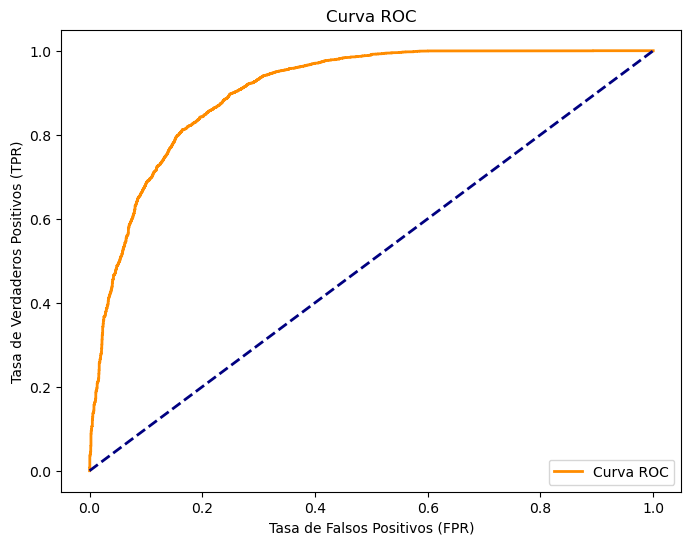

Área bajo la curva ROC = 0.9048746748401928


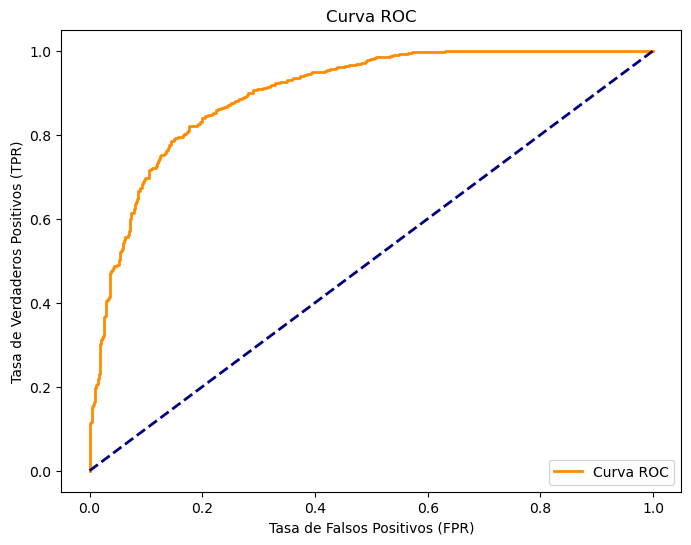

Área bajo la curva ROC = 0.8993020937188434


(0.9048746748401928, 0.8993020937188434)

In [171]:
curva_roc(crear_data_modelo(x_train,  modeloStepAIC['Variables']['cont'], modeloStepAIC['Variables']['categ'], modeloStepBIC['Variables']['inter']), y_train, modeloStepAIC),curva_roc(x_test_modeloStepAIC, y_test, modeloStepAIC)

In [129]:
modeloStepAIC_int = glm_stepwise(y_train, x_train, var_cont_sin_transf, var_categ, 
                                interacciones_unicas[:4], 'AIC')
# Resumen del modelo
summary_glm(modeloStepAIC_int['Modelo'], y_train, modeloStepAIC_int['X'])
# Calculamos la medida de ajuste R^2 para train
pseudoR2(modeloStepAIC_int['Modelo'], modeloStepAIC_int['X'], y_train)
# Preparo datos test
x_test_modeloStepAIC_int = crear_data_modelo(x_test, modeloStepAIC_int['Variables']['cont'], 
                                                modeloStepAIC_int['Variables']['categ'], 
                                                modeloStepAIC_int['Variables']['inter'])
# R-squared del modelo para test
pseudoR2(modeloStepAIC_int['Modelo'], x_test_modeloStepAIC_int, y_test)


Start: AIC = 8617.25477849295

y ~ 1

                                       Variable         AIC
                              + CodigoProvincia 4809.987920
                             + Age_under19_Ptge 7962.964057
                               + Age_over65_pct 8001.638082
                             + PersonasInmueble 8076.665461
                                 + Age_0-4_Ptge 8110.866750
                                + Age_19_65_pct 8331.117761
                                + ActividadPpal 8466.674489
                   + Existe_Indus_Const_Com_Ser 8466.704854
                          + WomanPopulationPtge 8476.523837
                     + SameComAutonDiffProvPtge 8485.388740
                                + PobChange_pct 8511.326761
                                   + Population 8515.248184
                                  + TotalCensus 8515.958088
 + ('Population', 'Existe_Indus_Const_Com_Ser') 8530.122222
              + ('Population', 'ActividadPpal') 8533.775586
  

0.43463352815383605

In [204]:

## Seleccion aleatoria (se coge la submuestra de los datos de entrenamiento)

# Inicializar un diccionario para almacenar las fórmulas y variables seleccionadas.
variables_seleccionadas = {
    'Formula': [],
    'Variables': [],
    'Interaccion': []
}

# Realizar 7 iteraciones de selección aleatoria. (en clase no se puede correr con 20)
for x in range(7):
    print('---------------------------- iter: ' + str(x))
    
    # Dividir los datos de entrenamiento en conjuntos de entrenamiento y prueba.
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, 
                                                            test_size = 0.3, random_state = 1234567 + x)
    
    # Realizar la selección stepwise utilizando el criterio BIC en la submuestra.
    modelo = glm_stepwise(y_train2.astype(int), x_train2, var_cont, var_categ, interacciones_unicas[:15], 'BIC')
    
    # Almacenar las variables seleccionadas y la fórmula correspondiente.
    variables_seleccionadas['Variables'].append(modelo['Variables'])
    variables_seleccionadas['Formula'].append(sorted(modelo['X'].columns))
# Unir las variables en las fórmulas seleccionadas en una sola cadena.
variables_seleccionadas['Formula'] = list(map(lambda x: '+'.join(x), variables_seleccionadas['Formula']))
    
# Calcular la frecuencia de cada fórmula y ordenarlas por frecuencia.
frecuencias = Counter(variables_seleccionadas['Formula'])
frec_ordenada = pd.DataFrame(list(frecuencias.items()), columns = ['Formula', 'Frecuencia'])
frec_ordenada = frec_ordenada.sort_values('Frecuencia', ascending = False).reset_index()

# Identificar las tres fórmulas más frecuentes y las variables correspondientes.
var_1 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][0])]
var_2 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][1])]
var_3 = variables_seleccionadas['Variables'][variables_seleccionadas['Formula'].index(
    frec_ordenada['Formula'][2])]


---------------------------- iter: 0
Start: BIC = 6051.096705451177

y ~ 1

                            Variable         BIC
                   + CodigoProvincia 3456.711938
                  + Age_under19_Ptge 5619.680374
                    + Age_over65_pct 5662.514274
                  + PersonasInmueble 5680.904326
                      + Age_0-4_Ptge 5713.508252
                     + Age_19_65_pct 5880.020284
        + Existe_Indus_Const_Com_Ser 5957.935172
                     + ActividadPpal 5957.938291
          + SameComAutonDiffProvPtge 5959.475865
               + WomanPopulationPtge 5959.903736
                        + Population 5975.739791
                       + TotalCensus 5980.755543
   + ('Population', 'ActividadPpal') 5986.875601
                     + PobChange_pct 5989.750826
                          + Densidad 6001.681220
               + UnemployLess25_Ptge 6003.830528
          + IndustryUnemploymentPtge 6009.576110
       + AgricultureUnemploymentPtge 6010.

In [225]:
var_2

{'cont': ['Explotaciones',
  'Age_19_65_pct',
  'ForeignersPtge',
  'AgricultureUnemploymentPtge',
  'DifComAutonPtge',
  'UnemployLess25_Ptge',
  'PobChange_pct'],
 'categ': ['CodigoProvincia', 'ActividadPpal', 'prop_missings'],
 'inter': []}

In [226]:
var_1

{'cont': ['ForeignersPtge',
  'Age_19_65_pct',
  'DifComAutonPtge',
  'Explotaciones',
  'UnemployLess25_Ptge',
  'PobChange_pct',
  'AgricultureUnemploymentPtge'],
 'categ': ['CodigoProvincia', 'ActividadPpal'],
 'inter': []}

In [297]:

## Comparacion final, tomo el ganador de antes y los nuevos candidatos
results2 = pd.DataFrame({
    'Rsquared': []
    , 'Resample': []
    , 'Modelo': []
})
for rep in range(5):
    modelo1 = validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , modeloStepAIC['Variables']['cont']
        , modeloStepAIC['Variables']['categ']
        , modeloStepAIC['Variables']['inter']
    )
    modelo2 = validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , var_1['cont']
        , var_1['categ']
        , var_1['inter']
    )
    modelo3 = validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , var_2['cont']
        , var_2['categ']
        , var_2['inter']
    )
    modelo4 = validacion_cruzada_glm(
        5
        , x_train
        , y_train
        , var_3['cont']
        , var_3['categ']
        , var_3['inter']
    )
    results_rep = pd.DataFrame({
        'AUC': modelo1 + modelo2 + modelo3 + modelo4
        , 'Resample': ['Rep' + str((rep + 1))]*5*4
        , 'Modelo': [1]*5 + [2]*5 + [3]*5 + [4]*5
    })
    results2 = pd.concat([results2, results_rep], axis = 0)

In [298]:

# Calcular la media de las métricas R-squared por modelo
media_AUC2= results.groupby('Modelo')['AUC'].mean()
# Calcular la desviación estándar de las métricas R-squared por modelo
std_AUC2 = results.groupby('Modelo')['AUC'].std()
# Contar el número de parámetros en cada modelo
num_params2 = [len(modeloStepAIC_int['Modelo'].coef_[0]), 
                 len(frec_ordenada['Formula'][0].split('+')),
                 len(frec_ordenada['Formula'][1].split('+')), 
                 len(frec_ordenada['Formula'][2].split('+'))]


In [305]:
media_AUC2

Modelo
1.0    0.899473
2.0    0.899473
3.0    0.899473
4.0    0.899473
5.0    0.883481
Name: AUC, dtype: float64

In [ ]:
0.899473
2.0    
3.0    
4.0    
5.0    

In [258]:
num_params2

[58, 58, 62, 56]

In [300]:
# Una vez decidido el mejor modelo, buscamos el mejor punto de corte 
ModeloGanador = modeloStepAIC


In [301]:


sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.4, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])
sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.6, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])
## Buscamos el mejor punto de corte


,PtoCorte,Accuracy,Sensitivity,Specificity,PosPredValue,NegPredValue
0,0.6,0.825739,0.866401,0.760064,0.853635,0.778878


In [325]:
sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.4, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

,PtoCorte,Accuracy,Sensitivity,Specificity,PosPredValue,NegPredValue
0,0.4,0.816502,0.934197,0.626409,0.80154,0.854945


In [326]:
posiblesCortes = np.arange(0, 1.01, 0.04).tolist()  # Generamos puntos de corte de 0 a 1 con intervalo de 0.04
rejilla = pd.DataFrame({
    'PtoCorte': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'PosPredValue': [],
    'NegPredValue': []
})  # Creamos un DataFrame para almacenar las métricas para cada punto de corte

for pto_corte in posiblesCortes:  # Iteramos sobre los puntos de corte
    rejilla = pd.concat(
        [rejilla, sensEspCorte(ModeloGanador['Modelo'], 
                               x_test, y_test, pto_corte, ModeloGanador['Variables']['cont'],
                               ModeloGanador['Variables']['categ'])],
        axis=0
    )  # Calculamos las métricas para el punto de corte actual y lo agregamos al DataFrame

rejilla['Youden'] = rejilla['Sensitivity'] + rejilla['Specificity'] - 1  # Calculamos el índice de Youden
rejilla.index = list(range(len(rejilla)))  # Reindexamos el DataFrame para que los índices sean consecutivos




In [327]:
# rejilla['Youden']

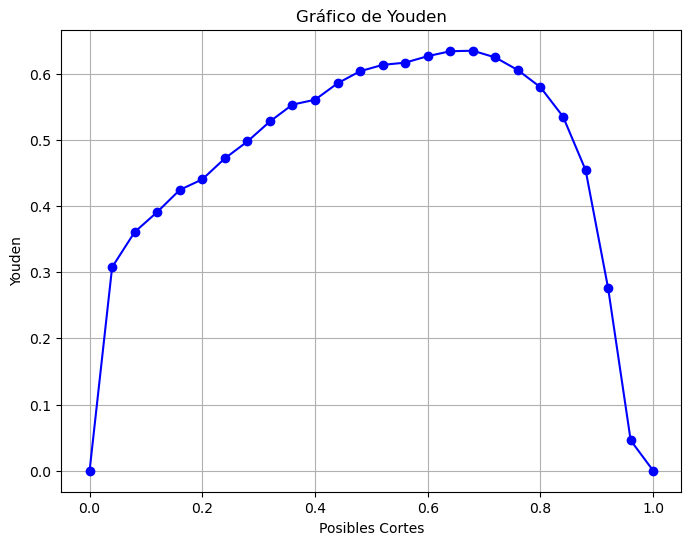

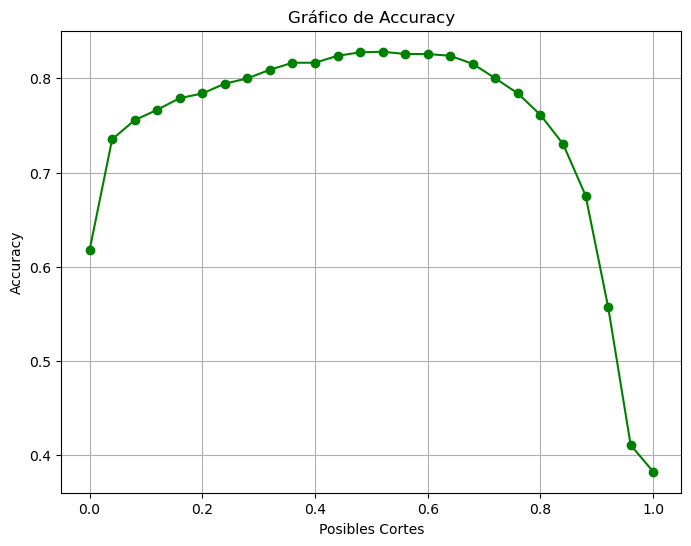

In [328]:
plt.figure(figsize=(8, 6))
plt.plot(rejilla['PtoCorte'], rejilla['Youden'], marker='o', linestyle='-', color='blue')
plt.xlabel('Posibles Cortes')
plt.ylabel('Youden')
plt.title('Gráfico de Youden')
plt.grid(True)
plt.show()

# Gráfico de Accuracy
plt.figure(figsize=(8, 6))
plt.plot(rejilla['PtoCorte'], rejilla['Accuracy'], marker='o', linestyle='-', color='green')
plt.xlabel('Posibles Cortes')
plt.ylabel('Accuracy')
plt.title('Gráfico de Accuracy')
plt.grid(True)
plt.show()

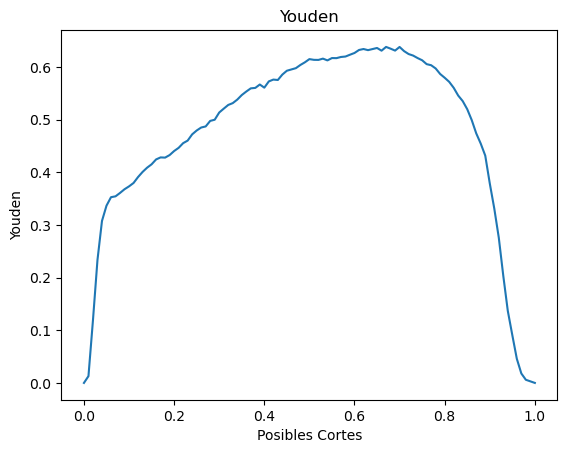

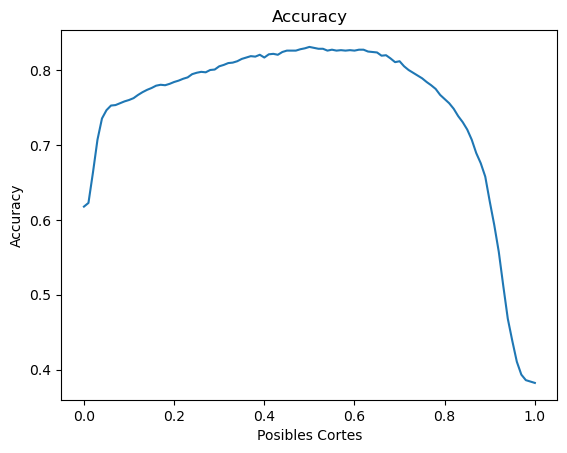

In [304]:

plt.plot(rejilla['PtoCorte'], rejilla['Youden'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Youden')
plt.title('Youden')
plt.show()

plt.plot(rejilla['PtoCorte'], rejilla['Accuracy'])
plt.xlabel('Posibles Cortes')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

In [270]:
rejilla['PtoCorte'][rejilla['Youden'].idxmax()]

0.67

In [271]:
rejilla['PtoCorte'][rejilla['Accuracy'].idxmax()]

0.5

In [329]:
#sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.67, [], ['Clasificacion', 'CalifProductor', 'Etiqueta'])
#sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.5, [], ['Clasificacion', 'CalifProductor', 'Etiqueta'])


In [335]:
#sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.67, ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

In [333]:
sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.67,
             ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

,PtoCorte,Accuracy,Sensitivity,Specificity,PosPredValue,NegPredValue
0,0.67,0.819581,0.821535,0.816425,0.878465,0.739067


In [334]:
sensEspCorte(ModeloGanador['Modelo'], x_test, y_test, 0.5, 
             ModeloGanador['Variables']['cont'], ModeloGanador['Variables']['categ'])

,PtoCorte,Accuracy,Sensitivity,Specificity,PosPredValue,NegPredValue
0,0.5,0.830665,0.906281,0.708535,0.833945,0.82397


In [278]:

# Vemos los coeficientes del modelo ganador
summary_glm(ModeloGanador['Modelo'], y_train, ModeloGanador['X'])

# Evaluamos la estabilidad del modelo a partir de las diferencias en train y test
pseudoR2(ModeloGanador['Modelo'], ModeloGanador['X'], y_train)


x_test_ModeloGanador = crear_data_modelo(x_test, ModeloGanador['Variables']['cont'],
                                         ModeloGanador['Variables']['categ'], ModeloGanador['Variables']['inter'])

pseudoR2(ModeloGanador['Modelo'], x_test_ModeloGanador, y_test)
    


Optimization terminated successfully.
         Current function value: 0.663068
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.665222
         Iterations 4


0.43463352815383605

In [336]:
#sensEspCorte(ModeloGanador['Modelo'], varObjBin, y_test, 0.75, [],ModeloGanador['Variables']['cont'],
#                                         ModeloGanador['Variables']['categ'], ModeloGanador['Variables']['inter'])
#sensEspCorte(ModeloGanador['Modelo'], varObjBin, y_test, 0.5, [],ModeloGanador['Variables']['cont'],
#                                         ModeloGanador['Variables']['categ'], ModeloGanador['Variables']['inter'])

KeyError: "None of [Index(['Clasificacion', 'CalifProductor', 'Etiqueta'], dtype='object')] are in the [columns]"